# Projet Data Mining : Estimate CO2 emissions from cars

In [2]:
#importation library
#from google.colab import drive
#drive.mount('/content/drive')
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 0. Importation du jeu de données

In [3]:
df = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/train.csv')

/var/folders/s3/c5vhrtm50hbggd9zt745xxnm0000gn/T/ipykernel_12867/4255629831.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/train.csv')


In [4]:
df_a_predir = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/test.csv')
#(1892913, 36)

/var/folders/s3/c5vhrtm50hbggd9zt745xxnm0000gn/T/ipykernel_12867/2622510558.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_a_predir = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/test.csv')


In [ ]:
df_copy=df.copy()
#copie de la df pour effectuer divers test

# 1. Conversion des colonnes categorielles et numeriques

In [5]:
# Reconversion de certaines colonnes
def reconversion_and_identification_col_cat_num(df, date='Date of registration', id='ID'):
  df[date] = pd.to_datetime(df[date], format="%Y-%m-%d")
  df[id] = df[id].astype(object) 
  col_cat = df.select_dtypes('object').columns.tolist()
  col_num = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
  
  print(f"Liste des colonnes catégorielles :\n{col_cat}")
  print(f"\nListe des colonnes numériques :\n{col_num}")
  return df,col_cat, col_num


In [6]:
df,col_cat, col_num= reconversion_and_identification_col_cat_num(df)

Liste des colonnes catégorielles :
['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'Ft', 'Fm', 'IT', 'Status']

Liste des colonnes numériques :
['MMS', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'Fuel consumption ', 'Electric range (km)']


In [7]:
df_a_predir,col_cat_a_predir, col_num_a_predir= reconversion_and_identification_col_cat_num(df_a_predir)

Liste des colonnes catégorielles :
['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'Ft', 'Fm', 'IT', 'Status']

Liste des colonnes numériques :
['MMS', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'Fuel consumption ', 'Electric range (km)']


In [8]:

def display_missing_values22(df,missing_chars=['nan', ' '] ):
    for col in df:
        for x in missing_chars:
            df[col] = df[col].replace(x, np.nan)

    nb_missing = df.isnull().sum()
    percent_missing = df.isnull().sum() * 100 / len(df)

    df_missing = pd.DataFrame({'variables': df.columns,'nb_missing': nb_missing ,'percent_missing': percent_missing})
    df_missing = df_missing.reset_index(drop=True)
    df_missing = df_missing.sort_values(by=['nb_missing'], ascending=False) #or by percent_missing
    return df_missing

In [9]:
display_missing_values22(df)


,variables,nb_missing,percent_missing
6,MMS,7571649,100.000000
32,Vf,7571649,100.000000
31,De,7571649,100.000000
29,Ernedc (g/km),7571649,100.000000
18,Enedc (g/km),6348010,83.839201
36,Electric range (km),6281247,82.957451
27,z (Wh/km),5904329,77.979434
30,Erwltp (g/km),3519145,46.477920
28,IT,2965793,39.169711
35,Fuel consumption,1779861,23.506914


In [10]:
display_missing_values22(df_a_predir)

,variables,nb_missing,percent_missing
6,MMS,1892913,100.000000
31,Vf,1892913,100.000000
30,De,1892913,100.000000
28,Ernedc (g/km),1892913,100.000000
18,Enedc (g/km),1587852,83.884045
35,Electric range (km),1570976,82.992509
26,z (Wh/km),1477106,78.033486
29,Erwltp (g/km),878526,46.411325
27,IT,739877,39.086688
34,Fuel consumption,444644,23.489933


# 2. Suppression des doublons


In [11]:
df.drop_duplicates(inplace=True)
#pas de doublons

# 3. Traitement des valeurs manquantes

Suppression des colonnes : constantes, non pertinentes pour l'objectif, et celles avec 100% de valeurs manquantes.

In [13]:
colonnes_a_supprimer_saufID=['MMS', 'Vf', 'De', 'Ernedc (g/km)','r','Status', 'Date of registration']
df_sans_colonnes_saufID = df.drop(colonnes_a_supprimer_saufID, axis=1)
df_sans_colonnes_saufID.nunique()

ID                     7571649
Country                     29
VFN                       8456
Mp                          10
Mh                          95
Man                        104
Tan                       6318
T                         1506
Va                        5413
Ve                       25570
Mk                         694
Cn                        8323
Ct                           5
Cr                           3
m (kg)                    2238
Mt                        2180
Enedc (g/km)                39
Ewltp (g/km)           7571649
W (mm)                     614
At1 (mm)                  1016
At2 (mm)                  1018
Ft                          11
Fm                           6
ec (cm3)                   265
ep (KW)                    399
z (Wh/km)                  343
IT                         486
Erwltp (g/km)              204
Fuel consumption           292
Electric range (km)        670
dtype: int64

In [14]:
colonnes_a_supprimer_saufID= ['MMS', 'Vf', 'De', 'Ernedc (g/km)','r','Status', 'Date of registration']
df_a_predir_sans_colonnes_saufID = df_a_predir.drop(colonnes_a_supprimer_saufID, axis=1)
df_a_predir_sans_colonnes_saufID.nunique()

ID                     1892913
Country                     29
VFN                       5549
Mp                          10
Mh                          89
Man                         91
Tan                       4810
T                         1033
Va                        4147
Ve                       18853
Mk                         475
Cn                        6059
Ct                           3
Cr                           3
m (kg)                    2089
Mt                        2108
Enedc (g/km)                39
W (mm)                     445
At1 (mm)                   599
At2 (mm)                   614
Ft                          11
Fm                           6
ec (cm3)                   189
ep (KW)                    339
z (Wh/km)                  293
IT                         377
Erwltp (g/km)              190
Fuel consumption           240
Electric range (km)        634
dtype: int64

In [ ]:
colonnes_a_supprimer= ['MMS', 'Vf', 'De', 'Ernedc (g/km)','r','Status', 'ID', 'Date of registration']
df_sans_colonnes = df.drop(colonnes_a_supprimer, axis=1)
df_sans_colonnes.nunique()

# 3.1 Colonnes sélectionnées pour le modèle

Nous avons inclus toutes les colonnes disponibles, même celles présentant un pourcentage élevé de valeurs manquantes. Après plusieurs analyses, nous avons observé que les valeurs manquantes ne représentaient pas nécessairement un manque d'information, mais parfois indiquaient une information nulle. Nous avons également conservé les colonnes avec un grand nombre de modalités, car des techniques d'encodage nous ont permis de les intégrer.

In [21]:

df_sans_col_mod_bcp = df_sans_colonnes[['Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn',
       'Ct', 'Cr', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)',
       'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)',
       'IT', 'Erwltp (g/km)', 'Fuel consumption ', 'Electric range (km)']]

df_sans_col_mod_bcp_saufID = df_sans_colonnes_saufID[['ID','Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn',
       'Ct', 'Cr', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)',
       'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)',
       'IT', 'Erwltp (g/km)', 'Fuel consumption ', 'Electric range (km)']]


df_a_predir_sans_col_mod_bcp_saufID = df_a_predir_sans_colonnes_saufID[['ID','Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn',
       'Ct', 'Cr', 'm (kg)', 'Mt', 'Enedc (g/km)','W (mm)',
       'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)',
       'IT', 'Erwltp (g/km)', 'Fuel consumption ', 'Electric range (km)']]



# 3.2) Résultats analyse Imputation 

In [ ]:
# Conclusion après plusieurs analyses exploratoires

# 1) Ct et Cr sont très liés et parfois des synonymes : donc on impute Ct à partir de Cr
# 2) Imputation de Fm à partir de Ft (variable très importante même dans les features importances des modèles de ML)
# 3) Variables quantitatives : W, AT1, AT2 (matrice de corrélation), m, Mt, ec, ep, Enedc, electric range : par régression/random forest avec comme variables explicatives non seulement des variables numériques mais aussi qualitatives : Mp, Ft, Fm, Ct
# 4) Certaines valeurs sont manquantes car elles valent 0 : groupby par Ft = catégorie de véhicules
# 5) VFN : résume plusieurs colonnes, Mp, Mk, Man, Mh, Cn : Il faudrait utiliser des techniques d'imputation NLP basées sur la vectorisation pour bien exploiter ces variables en raison du grand nombre de modalités.
# 6) TAN : résume plusieurs variables : Ve, Va, T, IT : Il faudrait utiliser des techniques d'imputation NLP basées sur la vectorisation pour bien exploiter ces variables en raison du grand nombre de modalités.

# 7) Electric range et fuel consumption (Enedc) = très important : il faut les imputer par catégorie car un véhicule électrique ne devrait pas consommer de carburant, donc les NaN représentent une absence de valeur et non une valeur manquante.
# Il en va de même pour Z, qui est électrique, d'où les 70% de valeurs manquantes, et Erwltp (g/km) - Réduction des émissions grâce à des technologies innovantes (WLTP). => Pour cela : affichage des % de variables manquantes par Ft/Fm et analyse de la distribution des variables quantitatives par catégorie de véhicule Ft.
# 8) Enedc (g/km) - Émissions spécifiques de CO2 (NEDC) : est très corrélé à la target y sauf qu'il y a 70% de valeurs manquantes.
# 9) Il faut imputer en se servant des informations que l'on a des variables non manquantes, en particulier : imputation par prédiction Random Forest pour les variables quantitatives en fonction de variables quantitatives mais aussi qualitatives. Mais attention à prendre en compte le fait que pour certaines modalités, les variables manquantes ont un sens.


# 3.3) Imputation des variables quantitatives importante (en terme metier)

pour l'estimation d'emission de CO2 : ['Enedc (g/km)', 'Electric range (km)', 'Fuel consumption ', 'Erwltp (g/km)']


# 3.3.1 Rassemblement des 2 dataframes

Dans l'objectif d'imputer les valeurs manquantes, il n'y a pas de raison que la df_pred soit imputée différemment que df_train, étant donné que les deux bases ont des distributions similaires. Nous avons rassemblé les deux dataframes pour avoir une représentation des données optimale et maximiser l'imputation. Cependant, utiliser la médiane ou le mode de l'ensemble d'entraînement pour les deux dataframes est également une bonne stratégie.




Pour l'étape de l'imputation, nous avons pris en considération qu'il fallait analyser :

- le pourcentage de valeurs manquantes par modalité, en particulier de la catégorie de véhicule (variable Ft), qui est la plus importante selon les modèles.
- effectuer des analyses en groupby, notamment par modalité de Ft : mode, médiane, moyenne, etc.

Ceci est particulièrement important à prendre en compte avant d'effectuer une imputation par prédiction, car une catégorie (par exemple, Ft=electric) pourrait être manquante à 100% et mener à de mauvaises performances. Il s'agit de l'étape la plus importante.


In [28]:
#Rassemblement des deux dataframe : df_reference 

# Créez une liste de colonnes communes
common_columns = list(set(df_a_predir_sans_col_mod_bcp_saufID.columns) & set(df_sans_col_mod_bcp_saufID .columns))

# Concaténez les deux DataFrames en utilisant les colonnes communes 
df_reference = pd.concat([df_a_predir_sans_col_mod_bcp_saufID[common_columns], df_sans_col_mod_bcp_saufID[common_columns]])

3.3.2 Création de 4 variables booléennes pour distinguer les valeurs manquantes

Nous avons choisi ces 4 variables jugées pertinentes pour cette tâche après analyse, car une absence de valeur a un sens pour ces variables.


In [31]:

colonnes_a_traiter = ['Enedc (g/km)', 'Electric range (km)', 'Fuel consumption ', 'Erwltp (g/km)']

# Création des nouvelles variables
for colonne in colonnes_a_traiter:
    nom_variable = f'{colonne}_indicator'
    df_a_predir_sans_col_mod_bcp_saufID[nom_variable] = 0 
    df_a_predir_sans_col_mod_bcp_saufID.loc[df_a_predir_sans_col_mod_bcp_saufID[colonne].notna() & (df_a_predir_sans_col_mod_bcp_saufID[colonne] != 0), nom_variable] = 1
    
for colonne in colonnes_a_traiter:
    nom_variable = f'{colonne}_indicator'
    df_sans_col_mod_bcp_saufID[nom_variable] = 0  
    df_sans_col_mod_bcp_saufID.loc[df_sans_col_mod_bcp_saufID[colonne].notna() & (df_sans_col_mod_bcp_saufID[colonne] != 0), nom_variable] = 1



3.3.2. Imputation de 'Enedc (g/km)' (médiane) en fonction (groupby) de la catégorie de véhicule Ft

In [34]:
#Nous avons separer deux groupes et pas chaque modalités pour eviter un bruit, la creation de ce groupes a etre faite 
# sur la base des analyses de distribution des variables quantiatives par categorie de vehicules Ft

df_electric_hydraugene= df_reference[df_reference['Ft'].isin(['ELECTRIC', 'HYDROGEN'])]
df_autre = df_reference[~df_reference['Ft'].isin(['ELECTRIC', 'HYDROGEN'])]

median_enedc_electric_hydraugene= df_electric_hydraugene['Enedc (g/km)'].median()
median_enedc_autre = df_autre['Enedc (g/km)'].median()

df_sans_col_mod_bcp_saufID['Enedc (g/km)'] = df_sans_col_mod_bcp_saufID.apply(
    lambda row: median_enedc_electric_hydraugene if row['Ft'] in ['ELECTRIC', 'HYDROGEN'] else median_enedc_autre
    if pd.isna(row['Enedc (g/km)']) else row['Enedc (g/km)'],
    axis=1
)

df_a_predir_sans_col_mod_bcp_saufID['Enedc (g/km)'] = df_a_predir_sans_col_mod_bcp_saufID.apply(
    lambda row: median_enedc_electric_hydraugene if row['Ft'] in ['ELECTRIC', 'HYDROGEN'] else median_enedc_autre
    if pd.isna(row['Enedc (g/km)']) else row['Enedc (g/km)'],
    axis=1
)

3.3.3 Imputation 'Electric range (km)' en fonction de Ft : separant les vehicules electriques des vehicules non electriques ( choix basé sur analyse effectués et data visualisation)

In [38]:
# Supposons que votre DataFrame s'appelle df_reference

df_electric = df_reference[df_reference['Ft'].isin(['ELECTRIC'])]
df_autre_electric = df_reference[~df_reference['Ft'].isin(['ELECTRIC'])]

median_Electric_range_electric= df_electric['Electric range (km)'].median()
median_Electric_range_autre = df_autre_electric['Electric range (km)'].median()

# Imputer les valeurs manquantes de 'Electric range (km)' en fonction de la colonne 'Ft'
df_sans_col_mod_bcp_saufID['Electric range (km)'] = df_sans_col_mod_bcp_saufID.apply(
    lambda row: median_Electric_range_electric if row['Ft'] in ['ELECTRIC'] else median_Electric_range_autre
    if pd.isna(row['Electric range (km)']) else row['Electric range (km)'],
    axis=1
)

# Imputer les valeurs manquantes de 'Electric range (km)' en fonction de la colonne 'Ft'
df_a_predir_sans_col_mod_bcp_saufID['Electric range (km)'] = df_a_predir_sans_col_mod_bcp_saufID.apply(
    lambda row: median_Electric_range_electric if row['Ft'] in ['ELECTRIC'] else median_Electric_range_autre
    if pd.isna(row['Electric range (km)']) else row['Electric range (km)'],
    axis=1
)

3.3.4 Imputation Fuel consumption et ERWLTP

In [42]:
# Imputation de 'Fuel consumption' par la médiane sans groupby :

# car la médiane par catégorie était plus ou moins proche et seule la catégorie electric avait une valeur très élevée de 9.
# Mais cette contradiction s'explique par un taux de valeur manquante de 99% pour cette catégorie, il s'agit d'un outlier : imputer par la médiane indiquerait donc que cette catégorie comporte beaucoup de valeurs manquantes, 
# mais l'intuition derrière c'est que c'est parce que les véhicules électriques ne consomment pas par définition de fuel.
# Nous avons par la suite également créé une variable d'imputation par un Random Forest que nous avons ajoutée à cette imputation.

median_fuel_consumption = df_reference['Fuel consumption '].median()
df_sans_col_mod_bcp_saufID['Fuel consumption '] = df_sans_col_mod_bcp_saufID['Fuel consumption '].fillna(median_fuel_consumption)
df_a_predir_sans_col_mod_bcp_saufID['Fuel consumption '] = df_a_predir_sans_col_mod_bcp_saufID['Fuel consumption '].fillna(median_fuel_consumption)


df_sans_col_mod_bcp_saufID['Fuel consumption '] = df_sans_col_mod_bcp_saufID['Fuel consumption '].fillna(median_fuel_consumption)
df_a_predir_sans_col_mod_bcp_saufID['Fuel consumption '] = df_a_predir_sans_col_mod_bcp_saufID['Fuel consumption '].fillna(median_fuel_consumption)

# Imputation Erwltp

median_Erwltp = df_reference['Erwltp (g/km)'].median()

df_sans_col_mod_bcp_saufID['Erwltp (g/km)'] = df_sans_col_mod_bcp_saufID['Erwltp (g/km)'].fillna(median_Erwltp )
df_a_predir_sans_col_mod_bcp_saufID['Erwltp (g/km)'] = df_a_predir_sans_col_mod_bcp_saufID['Erwltp (g/km)'].fillna(median_Erwltp)

# 3.4) Imputation des variables catégorielles qui ont peu de modalités et qui expliquent beaucoup le modèle : Fm, Ct, Mp, etc.


3.4.1) Imputation de Fm : Fm est très lié à Ft, donc imputation par groupby mode de la catégorie Ft

In [47]:
# Calculer le mode de la colonne 'Fm' pour chaque modalité de 'Ft' 
#Pour la categorie unknown : il ya que des nan donc creation de la modalité unknown
modes_fm_par_ft = df_reference.groupby('Ft')['Fm'].apply(lambda x: x.mode().iloc[0] if not x.empty and not x.mode().empty else 'Unknown')
modes_fm_df = pd.DataFrame({'Ft': modes_fm_par_ft.index, 'Mode_Fm': modes_fm_par_ft.values}) 
print(modes_fm_df) 

                 Ft  Mode_Fm
0            DIESEL        M
1   DIESEL/ELECTRIC        P
2               E85        H
3          ELECTRIC        E
4          HYDROGEN        M
5               LPG        B
6                NG        M
7     NG-BIOMETHANE        B
8            PETROL        M
9   PETROL/ELECTRIC        P
10          UNKNOWN  Unknown


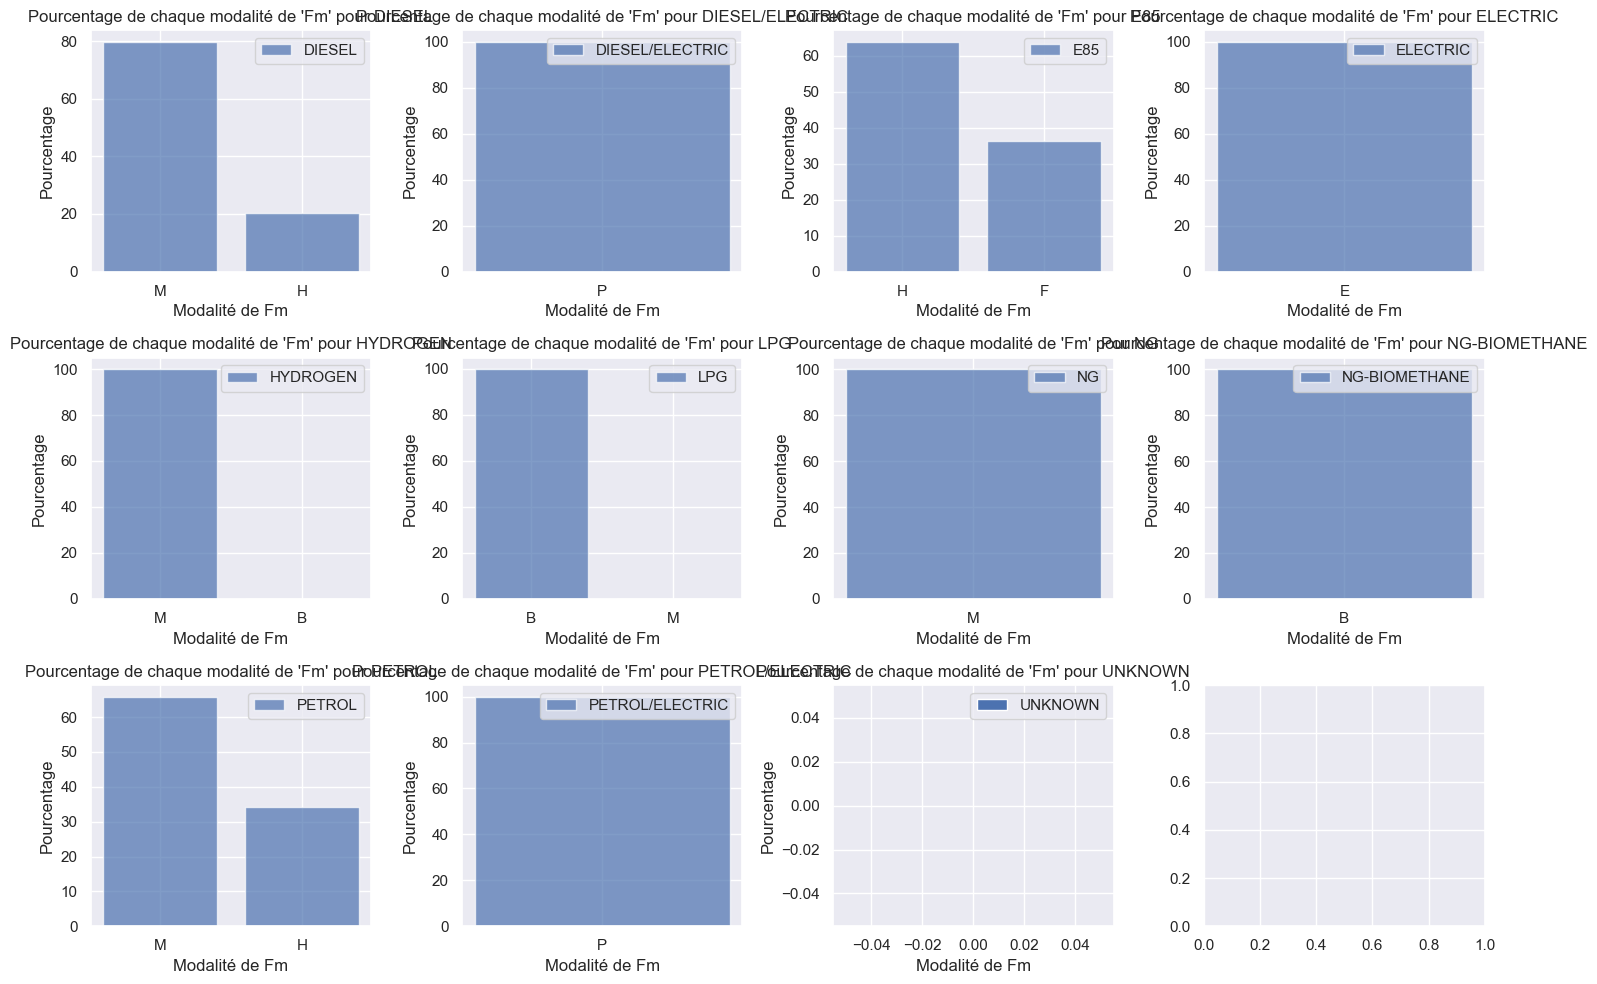

In [49]:
# Verification de la pertience de l'imputation:  % de vehicules quo ont une valeur qui correspond au mode par Ft = 1ere metrique de pertinence

import matplotlib.pyplot as plt
import seaborn as sns

# Réinitialiser le style de seaborn pour une meilleure apparence des graphiques
sns.set()

# Définir le nombre de lignes et de colonnes pour les sous-graphiques
rows = 3  # Vous pouvez ajuster cela en fonction de votre nombre de modalités 'Ft'
cols = 4  # Vous pouvez ajuster cela en fonction de votre nombre de modalités 'Ft'

# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Parcourir chaque groupe par 'Ft' et le placer dans un sous-graphique
for (ft_modalite, group), ax in zip(df_reference.groupby('Ft'), axes.flatten()):
    # Calculer les pourcentages de chaque modalité de 'Fm'
    fm_counts = group['Fm'].value_counts(normalize=True) * 100
    
    # Créer un graphique à barres empilées
    ax.bar(fm_counts.index, fm_counts, label=ft_modalite, alpha=0.7)

    # Ajouter des étiquettes et un titre au sous-graphique
    ax.set_xlabel("Modalité de Fm")
    ax.set_ylabel("Pourcentage")
    ax.set_title(f"Pourcentage de chaque modalité de 'Fm' pour {ft_modalite}")
    ax.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


In [ ]:
# Calculer le pourcentage de valeurs manquantes pour chaque modalité de 'Cr': 2 eme metrique de pertinence de l'imutation
#M1G est en partie manquant donc il ya un apport 
missing_percentage_by_cr = df_reference.groupby('Cr')['Ct'].apply(lambda x: x.isna().mean() * 100)

# Afficher les résultats
print("Pourcentage de valeurs manquantes pour chaque modalité de 'Cr':")
print(missing_percentage_by_cr)

Pourcentage de valeurs manquantes pour chaque modalité de 'Cr':
Cr
M1     0.159809
M1G    0.071989
M1S    0.000000
Name: Ct, dtype: float64


In [50]:
# Imputation 
df_sans_col_mod_bcp_saufID['Fm'] = df_sans_col_mod_bcp_saufID.apply(lambda row: modes_fm_par_ft[row['Ft']] if pd.isna(row['Fm']) else row['Fm'], axis=1)
df_a_predir_sans_col_mod_bcp_saufID['Fm'] = df_a_predir_sans_col_mod_bcp_saufID.apply(lambda row: modes_fm_par_ft[row['Ft']] if pd.isna(row['Fm']) else row['Fm'], axis=1)

3.4.2) Imputation Ct en fonction de Cr

In [53]:
# Calculer le mode de la colonne 'Fm' pour chaque modalité de 'Ft'
modes_Ct_par_Cr = df_reference.groupby('Cr')['Ct'].apply(lambda x: x.mode().iloc[0] if not x.empty and not x.mode().empty else 'Unknown')

# Créer une DataFrame avec les modes de 'Fm' par rapport à chaque modalité de 'Ft'
modes_Ct_df = pd.DataFrame({'Cr': modes_Ct_par_Cr.index, 'Mode_Ct': modes_Ct_par_Cr.values})

# Afficher les résultats
modes_Ct_df 

,Cr,Mode_Ct
0,M1,M1
1,M1G,M1G
2,M1S,M1


In [ ]:

# Imputation train 

# Liste des catégories
categories = ['M1', 'M1G', 'M1S']

# Liste pour stocker les DataFrame de chaque catégorie
dfs_category = []

# Parcourir chaque catégorie
for category in categories:
    # Filtrer le DataFrame pour la catégorie spécifique
    df_category = df_sans_col_mod_bcp_saufID[df_sans_col_mod_bcp_saufID['Cr'] == category]

    # Calculer le mode de 'Ct' pour cette catégorie
    mode_Ct_category = df_category['Ct'].mode().iloc[0] if not df_category.empty and not df_category['Ct'].mode().empty else 'Unknown'

    # Imputer les valeurs manquantes dans 'Ct' pour cette catégorie
    df_category.loc[df_category['Ct'].isna(), 'Ct'] = mode_Ct_category

    # Ajouter le DataFrame mis à jour à la liste
    dfs_category.append(df_category)

# Concaténer les DataFrames de chaque catégorie en un seul
df_sans_col_mod_bcp_saufID= pd.concat(dfs_category)

# Trier le DataFrame par ordre croissant des ID
df_sans_col_mod_bcp_saufID.sort_values(by='ID', inplace=True)

# Afficher le DataFrame final
print(df_sans_col_mod_bcp_saufID)


In [ ]:
#Imputation test

def impute_values_for_category(df_category):
    # Calculer le mode de 'Ct' pour cette catégorie
    mode_Ct_category = df_category['Ct'].mode().iloc[0] if not df_category.empty and not df_category['Ct'].mode().empty else 'Unknown'

    # Imputer les valeurs manquantes dans 'Ct' pour cette catégorie
    df_category.loc[df_category['Ct'].isna(), 'Ct'] = mode_Ct_category

    return df_category

# Liste des catégories
categories = ['M1', 'M1G', 'M1S']

# Liste pour stocker les DataFrame de chaque catégorie
dfs_category_a_predir = []

# Parcourir chaque catégorie
for category in categories:
    # Filtrer le DataFrame pour la catégorie spécifique
    df_category_a_predir = df_a_predir_sans_col_mod_bcp_saufID[df_a_predir_sans_col_mod_bcp_saufID['Cr'] == category]

    # Utiliser la fonction pour imputer les valeurs manquantes
    df_category_a_predir_imputed = impute_values_for_category(df_category_a_predir)

    # Ajouter le DataFrame mis à jour à la liste
    dfs_category_a_predir.append(df_category_a_predir_imputed)

# Concaténer les DataFrames de chaque catégorie en un seul
df_a_predir_sans_col_mod_bcp_saufID = pd.concat(dfs_category_a_predir)

# Trier le DataFrame par ordre croissant des ID
df_a_predir_sans_col_mod_bcp_saufID.sort_values(by='ID', inplace=True)
print(df_a_predir_sans_col_mod_bcp_saufID)


3.4.3) Imputation du reste des variables numeriques et categorielles par la mediane et le mode des deux dataframe combiné

Nous n'avons pas imputer les autres variables par groupby des modalite de Ft jugée pas assez utile et pour eviter trop de surapprentissage et le bruit.

In [ ]:
#imputation variables quantitatives 
# Sélectionner les variables numériques avec des valeurs manquantes
numeric_columns2 = df_a_predir_sans_col_mod_bcp_saufID.select_dtypes(include=['float64', 'int64']).columns
numeric_columns1= df_sans_col_mod_bcp_saufID.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns2) 

missing_numeric_columns2 = df_a_predir_sans_col_mod_bcp_saufID[numeric_columns2].columns[df_a_predir_sans_col_mod_bcp_saufID[numeric_columns2].isnull().any()]
missing_numeric_columns1 = df_sans_col_mod_bcp_saufID[numeric_columns1].columns[df_sans_col_mod_bcp_saufID[numeric_columns1].isnull().any()]


# Imputer les valeurs manquantes dans df1
for col in missing_numeric_columns2:
    median_value = df_reference[col].median()
    df_a_predir_sans_col_mod_bcp_saufID[col].fillna(median_value, inplace=True)

# Imputer les valeurs manquantes dans df2
for col in missing_numeric_columns1:
    median_value = df_reference[col].median()
    df_sans_col_mod_bcp_saufID[col].fillna(median_value, inplace=True)

In [ ]:
# Imputation variables catégorielles

# Sélectionner les colonnes catégorielles avec des valeurs manquantes
categorical_columns2 = df_a_predir_sans_col_mod_bcp_saufID.select_dtypes(include=['object']).columns
categorical_columns1 = df_sans_col_mod_bcp_saufID.select_dtypes(include=['object']).columns
print(categorical_columns2)
# Trouver les colonnes catégorielles avec des valeurs manquantes dans df_a_predir_sans_col_mod_bcp_saufID
missing_categorical_columns2 = df_a_predir_sans_col_mod_bcp_saufID[categorical_columns2].columns[df_a_predir_sans_col_mod_bcp_saufID[categorical_columns2].isnull().any()]

# Trouver les colonnes catégorielles avec des valeurs manquantes dans df_sans_col_mod_bcp_saufID
missing_categorical_columns1 = df_sans_col_mod_bcp_saufID[categorical_columns1].columns[df_sans_col_mod_bcp_saufID[categorical_columns1].isnull().any()]

# Imputer les valeurs manquantes dans df_a_predir_sans_col_mod_bcp_saufID avec le mode
for col in missing_categorical_columns2:
    mode_value = df_reference[col].mode().iloc[0] # imputation par df fusion
    df_a_predir_sans_col_mod_bcp_saufID[col].fillna(mode_value, inplace=True)

# Imputer les valeurs manquantes dans df_sans_col_mod_bcp_saufID avec le mode
for col in missing_categorical_columns1:
    mode_value = df_reference[col].mode().iloc[0]
    df_sans_col_mod_bcp_saufID[col].fillna(mode_value, inplace=True)

In [66]:
display_missing_values22(df_sans_col_mod_bcp_saufID)

,variables,nb_missing,percent_missing
0,ID,0,0.0
25,z (Wh/km),0,0.0
19,At1 (mm),0,0.0
20,At2 (mm),0,0.0
21,Ft,0,0.0
22,Fm,0,0.0
23,ec (cm3),0,0.0
24,ep (KW),0,0.0
26,IT,0,0.0
1,Country,0,0.0


In [67]:
display_missing_values22(df_a_predir_sans_col_mod_bcp_saufID)

,variables,nb_missing,percent_missing
0,ID,0,0.0
17,W (mm),0,0.0
31,Fuel consumption _indicator,0,0.0
30,Electric range (km)_indicator,0,0.0
29,Enedc (g/km)_indicator,0,0.0
28,Electric range (km),0,0.0
27,Fuel consumption,0,0.0
26,Erwltp (g/km),0,0.0
25,IT,0,0.0
24,z (Wh/km),0,0.0


In [68]:
# importation de l'imputation en csv pour enregistrer et eviter la perte a cause des problemes de memoires de df_train(df_sans_col_mod_bcp_saufID) et df_a_predir (df_a_predir_sans_col_mod_bcp_saufID)
# Exporter df_sans_col_mod_bcp_saufID
df_sans_col_mod_bcp_saufID.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_sans_col_mod_bcp_saufID.csv', index=False)
# Exporter df_a_predir_sans_col_mod_bcp_saufID
df_a_predir_sans_col_mod_bcp_saufID.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_a_predir_sans_col_mod_bcp_saufID.csv', index=False)

# 3.5 Création de variables ajoutées à la base de données imputée : imputation par Random Forest de la variable Mp et des variables quantitatives telles que : fuel consumption, etc.


Etant donnée que l'imputation par random forest a ete faite variable par variable apres la recuperation du fichier csv des imputation, voici les etapes a suivre generales

Nous avons choisies de rajouter des variable imputer par RF : sur la variable categorielle Mp, car c'est une des variables les plus importantes du modele ( algorithme autocarver). Nous avons egalement imputer la variables quantitative fuel consumption par prdiction (electric range et endec n'ont pas permit d'ameliorer le modele avec cette methode d'imputation)

In [ ]:
#Preparation df

df.set_index('ID', inplace=True)
df_a_predir.set_index('ID', inplace=True)

#df_dumFt= pd.get_dummies(df, columns=['Ft'], prefix='Ft')
#df_apred_dumFt= pd.get_dummies(df_a_predir, columns=['Ft'], prefix='Ft')

# Colonnes à encoder pour imputation des variables quantitatives
colonnes_a_encoder= ['Ft', 'Fm', 'Ct'] #l'imputation de Mp supression Mp dans l'encodage
# colonnes_a_encoder= ['Ft', 'Fm', 'Ct', Mp] #pour imputation fuel consumption

df_dumFt = pd.get_dummies(df, columns=colonnes_a_encoder, prefix=colonnes_a_encoder)
df_apred_dumFt = pd.get_dummies(df_a_predir, columns=colonnes_a_encoder, prefix=colonnes_a_encoder)

df_concatenated = pd.concat([df_dumFt, df_apred_dumFt])

df_dumFt = df_dumFt.drop(columns=['Ewltp (g/km)'], errors='ignore')

# Rajout a la regression de 3 variables booleenne pour indiquer la presence ou l'absence de cette variable : jugé pertinent 
# pour eviter que les vehicules electric ne soit pas representer par le modeles par exemple.

# Créer une variable binaire pour "electric range"
df_dumFt ['electric_range_binary'] = df_dumFt ['Electric range (km)'].notnull().astype(int)

# Créer une variable binaire pour "fuel consumption"
df_dumFt ['fuel_consumption_binary'] = df_dumFt ['Fuel consumption '].notnull().astype(int)

# Supposons que df_encoded_train est votre DataFrame

# Créer une variable binaire pour "electric range"
df_apred_dumFt['electric_range_binary'] =df_apred_dumFt['Electric range (km)'].notnull().astype(int)

# Créer une variable binaire pour "fuel consumption"
df_apred_dumFt['fuel_consumption_binary'] = df_apred_dumFt['Fuel consumption '].notnull().astype(int)

# Supposons que df_encoded_train est votre DataFrame

# Créer une variable binaire pour "electric range"
df_dumFt['Enedc (g/km)_binary'] =df_dumFt['Enedc (g/km)'].notnull().astype(int)

# Créer une variable binaire pour "fuel consumption"
df_apred_dumFt['Enedc (g/km)_binary'] = df_apred_dumFt['Enedc (g/km)'].notnull().astype(int)



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# supprime les colonnes non pertinentes de chaque df
def supr_col(df, list_colonnes_non_pertinentes=[ 'ep (KW)', 'z (Wh/km)','Cn', 'Country', 'Cr', 'Date of registration', 'De', 'Ernedc (g/km)', 'Erwltp (g/km)', 'IT', 'MMS', 'Man', 'Mh', 'Mk',  'Status', 'T', 'Tan', 'VFN', 'Va', 'Ve', 'Vf', 'r']):

   #'ep (KW)'
   # #'At2 (mm)'
   # ##'ep (KW)',  'z (Wh/km)', 'At1 (mm)','At2 (mm)'
    
    df = df.drop(columns=list_colonnes_non_pertinentes)
    return df

# Selection ensemble de test et ensemble train
def selection_ensemble_de_test(df_apred_dumFt, df_dumFt, colonnes_a_imputer):
    df_concatenated = pd.concat([df_dumFt, df_apred_dumFt])
    Ensemble_test_target = df_concatenated[df_concatenated[colonnes_a_imputer].isna()]  # target
    indices_a_supprimer = Ensemble_test_target.index
    Ensemble_train_target = df_concatenated.drop(indices_a_supprimer)  # toutes les lignes qui ont pas la target manquantes ; train temporaire
    return Ensemble_test_target, Ensemble_train_target

# On supprime les colonnes qui contiennent au moins une valeur manquante
def colonnes_non_candidates(ensemble_test_target):
    colonnes_avec_valeurs_manquantes_target = ensemble_test_target.columns[ensemble_test_target.isna().any()].tolist()
    return colonnes_avec_valeurs_manquantes_target

def train_test_X_Y(colonnes_a_imputer, ensemble_test_target, df_apred_dumFt, df_dumFt, colonnes_avec_valeurs_manquantes_target: list):
    # colonnes_avec_valeurs_manquantes_target : rajouter target aussi PR LA SUPR
    Ensemble_test_target, Ensemble_train_target = selection_ensemble_de_test(df_apred_dumFt, df_dumFt, colonnes_a_imputer)
    colonnes_avec_valeurs_manquantes_target = colonnes_non_candidates(Ensemble_test_target)

    # creation ensembre test (predir vraiment pr col a imputer) : X et Y
    Ensemble_test_target_Y = Ensemble_test_target[colonnes_a_imputer]
    Ensemble_test_target_X = Ensemble_test_target.drop(columns=colonnes_avec_valeurs_manquantes_target)  # verifier que colonne a imputer a ete supprimee

    # creation ensemble train ; X et Y (non manquant)
    Ensemble_train_target = Ensemble_train_target.dropna()
    Ensemble_train_target_Y = Ensemble_train_target[colonnes_a_imputer]
    Ensemble_train_target_X = Ensemble_train_target.drop(columns=colonnes_avec_valeurs_manquantes_target)

    return Ensemble_test_target_Y, Ensemble_test_target_X, Ensemble_train_target_Y, Ensemble_train_target_X

#Nous avions tester la regression mais c'est moins performant
def imputer_valeurs_manquantes_regression1(df_apred_dumFt, df_dumFt, colonnes_a_imputers):
    df_imputed1 = df_dumFt.copy()
    df_imputed2 = df_apred_dumFt.copy()  # Place de encoded
    df_concatenated = pd.concat([df_dumFt, df_apred_dumFt])
    df_imputed = df_concatenated.copy()

    # Remarque: pour ne pas imputer les prochaines colonnes sur la base des colonnes imputées
    df_dumFt = supr_col(df_dumFt)
    df_apred_dumFt = supr_col(df_apred_dumFt)
    df_concatenated = supr_col(df_concatenated)

    for col in colonnes_a_imputers:
        Ensemble_test_target, Ensemble_train_target = selection_ensemble_de_test(df_apred_dumFt, df_dumFt, [col])
        colonnes_avec_valeurs_manquantes_target = colonnes_non_candidates(Ensemble_test_target)

        Ensemble_test_target_Y, Ensemble_test_target_X, Ensemble_train_target_Y, Ensemble_train_target_X = train_test_X_Y(col, Ensemble_test_target, df_apred_dumFt, df_dumFt, colonnes_avec_valeurs_manquantes_target)
        model = LinearRegression()
        print(f"Taille de l'ensemble d'entraînement pour la colonne {col}: {Ensemble_train_target_X.shape}")
        model.fit(Ensemble_train_target_X, Ensemble_train_target_Y)
        predicted_values = model.predict(Ensemble_test_target_X)

        df_imputed.loc[df_imputed[col].isna(), col] = predicted_values
        # utilisation de df_imputed
        # pour les performances

        print(col)
        print(Ensemble_train_target_X.columns)
        print(model.coef_)
        print(model.intercept_)
        y_train_pred = model.predict(Ensemble_train_target_X)
        mae_train = mean_absolute_error(Ensemble_train_target_Y, y_train_pred)
        print(f'MAE estimée sur l\'ensemble train pour la colonne {col}: {mae_train}')
        
        
        # Calcul de la MAE entre la médiane et les vraies valeurs
        mediane_train = Ensemble_train_target_Y.median()
        mae_mediane = mean_absolute_error(Ensemble_train_target_Y, [mediane_train] * len(Ensemble_train_target_Y))
        print(f'MAE entre la médiane et les vraies valeurs pour la colonne {col}: {mae_mediane}')


    return df_imputed



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Imputation par random forest pour les variables quantitative

def imputer_valeurs_manquantes_random_forest(df_apred_dumFt, df_dumFt, colonnes_a_imputers):
    df_imputed1 = df_dumFt.copy()
    df_imputed2 = df_apred_dumFt.copy()  # Place de encoded
    df_concatenated = pd.concat([df_dumFt, df_apred_dumFt])
    df_imputed = df_concatenated.copy()

    # Remarque: pour ne pas imputer les prochaines colonnes sur la base des colonnes imputées
    df_dumFt = supr_col(df_dumFt)
    df_apred_dumFt = supr_col(df_apred_dumFt)
    df_concatenated = supr_col(df_concatenated)

    for col in colonnes_a_imputers:
        Ensemble_test_target, Ensemble_train_target = selection_ensemble_de_test(df_apred_dumFt, df_dumFt, [col])
        colonnes_avec_valeurs_manquantes_target = colonnes_non_candidates(Ensemble_test_target)

        Ensemble_test_target_Y, Ensemble_test_target_X, Ensemble_train_target_Y, Ensemble_train_target_X = train_test_X_Y(col, Ensemble_test_target, df_apred_dumFt, df_dumFt, colonnes_avec_valeurs_manquantes_target)
        
        # Use RandomForestRegressor instead of LinearRegression
        model = RandomForestRegressor(n_estimators=120, random_state=42) # Parametre a ameliorer si ressources technique disponible
        print(f"Taille de l'ensemble d'entraînement pour la colonne {col}: {Ensemble_train_target_X.shape}")
        model.fit(Ensemble_train_target_X, Ensemble_train_target_Y)
        predicted_values = model.predict(Ensemble_test_target_X)

        df_imputed.loc[df_imputed[col].isna(), col] = predicted_values
        # utilisation de df_imputed
        # pour les performances

        print(col)
        print(Ensemble_train_target_X.columns)
        print(model.feature_importances_)  # Check feature importances if needed
        y_train_pred = model.predict(Ensemble_train_target_X)
        mae_train = mean_absolute_error(Ensemble_train_target_Y, y_train_pred)
        print(f'MAE estimée sur l\'ensemble train pour la colonne {col}: {mae_train}')
        
        # Calcul de la MAE entre la médiane et les vraies valeurs
        mediane_train = Ensemble_train_target_Y.median()
        mae_mediane = mean_absolute_error(Ensemble_train_target_Y, [mediane_train] * len(Ensemble_train_target_Y))
        print(f'MAE entre la médiane et les vraies valeurs pour la colonne {col}: {mae_mediane}')

    return df_imputed


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Imputation par Random Forest pour les variables qualitatives

def imputer_valeurs_manquantes_random_forest_classif(df_apred_dumFt, df_dumFt, colonnes_a_imputers):
    df_imputed1 = df_dumFt.copy()
    df_imputed2 = df_apred_dumFt.copy()  # Place de encoded
    df_concatenated = pd.concat([df_dumFt, df_apred_dumFt])
    df_imputed = df_concatenated.copy()

    # Remarque: pour ne pas imputer les prochaines colonnes sur la base des colonnes imputées
    df_dumFt = supr_col(df_dumFt)
    df_apred_dumFt = supr_col(df_apred_dumFt)
    df_concatenated = supr_col(df_concatenated)

    for col in colonnes_a_imputers:
        Ensemble_test_target, Ensemble_train_target = selection_ensemble_de_test(df_apred_dumFt, df_dumFt, [col])
        colonnes_avec_valeurs_manquantes_target = colonnes_non_candidates(Ensemble_test_target)

        Ensemble_test_target_Y, Ensemble_test_target_X, Ensemble_train_target_Y, Ensemble_train_target_X = train_test_X_Y(col, Ensemble_test_target, df_apred_dumFt, df_dumFt, colonnes_avec_valeurs_manquantes_target)
        
        # Use RandomForestClassifier instead of RandomForestRegressor
        model = RandomForestClassifier(n_estimators=120, random_state=42) # Parametre a ameliorer si ressources technique disponible
        print(f"Taille de l'ensemble d'entraînement pour la colonne {col}: {Ensemble_train_target_X.shape}")
        model.fit(Ensemble_train_target_X, Ensemble_train_target_Y)
        predicted_values = model.predict(Ensemble_test_target_X)

        df_imputed.loc[df_imputed[col].isna(), col] = predicted_values
        # utilisation de df_imputed
        # pour les performances

        print(col)
        print(Ensemble_train_target_X.columns)
        print(model.feature_importances_)  # Check feature importances if needed

        # Utiliser accuracy_score pour évaluer la précision du modèle
        accuracy = accuracy_score(Ensemble_train_target_Y, model.predict(Ensemble_train_target_X))
        print(f'Précision estimée sur l\'ensemble train pour la colonne {col}: {accuracy}')

    return df_imputed


In [ ]:
#Imputation Mp
colonnes_a_imputers = ['Mp']
df_imputed_Mp_RF = imputer_valeurs_manquantes_random_forest_classif(df_apred_dumFt, df_dumFt, colonnes_a_imputers)


Taille de l'ensemble d'entraînement pour la colonne Mp: (148849, 23)
Mp
Index(['Ft_DIESEL', 'Ft_DIESEL/ELECTRIC', 'Ft_E85', 'Ft_ELECTRIC',
       'Ft_HYDROGEN', 'Ft_LPG', 'Ft_NG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL',
       'Ft_PETROL/ELECTRIC', 'Ft_UNKNOWN', 'Fm_B', 'Fm_E', 'Fm_F', 'Fm_H',
       'Fm_M', 'Fm_P', 'Ct_M1', 'Ct_M1G', 'Ct_N1', 'electric_range_binary',
       'fuel_consumption_binary', 'Enedc (g/km)_binary'],
      dtype='object')
[0.         0.42408516 0.         0.         0.         0.
 0.         0.         0.         0.43543817 0.         0.
 0.         0.         0.         0.         0.         0.07116679
 0.06930988 0.         0.         0.         0.        ]
Précision estimée sur l'ensemble train pour la colonne Mp: 0.33306236521575555


In [ ]:
colonnes_a_imputers = ['Fuel consumption ']

#['Electric range (km)', 'Enedc (g/km)', 'm (kg)', 'Mt', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)','z (Wh/km)']

df_imputed_fuel_consumption_RF = imputer_valeurs_manquantes_random_forest(df_apred_dumFt, df_dumFt, colonnes_a_imputers)

#Imputer les variable un a un et les stocker pour eviter les problems de memoires

Taille de l'ensemble d'entraînement pour la colonne Fuel consumption : (166577, 33)
Fuel consumption 
Index(['Ft_DIESEL', 'Ft_DIESEL/ELECTRIC', 'Ft_E85', 'Ft_ELECTRIC',
       'Ft_HYDROGEN', 'Ft_LPG', 'Ft_NG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL',
       'Ft_PETROL/ELECTRIC', 'Ft_UNKNOWN', 'Fm_B', 'Fm_E', 'Fm_F', 'Fm_H',
       'Fm_M', 'Fm_P', 'Ct_M1', 'Ct_M1G', 'Ct_N1', 'Mp_BMW', 'Mp_FORD',
       'Mp_HYUNDAI MOTOR EUROPE', 'Mp_KIA', 'Mp_MAZDA-SUBARU-SUZUKI-TOYOTA',
       'Mp_MERCEDES-BENZ', 'Mp_RENAULT-NISSAN-MITSUBISHI', 'Mp_STELLANTIS',
       'Mp_TESLA-HONDA-JLR', 'Mp_VOLKSWAGEN', 'electric_range_binary',
       'fuel_consumption_binary', 'Enedc (g/km)_binary'],
      dtype='object')
[0.         0.01024157 0.         0.         0.         0.
 0.         0.         0.         0.03885662 0.         0.
 0.         0.         0.         0.         0.         0.14754641
 0.         0.         0.09657839 0.08089215 0.05417866 0.06547258
 0.06694218 0.10563184 0.01851722 0.2351204  0.0143066

In [ ]:
#Regroupement en train et test
df_imputed_fuel_consumption_RF_train = df_imputed_m_Mt_RF.iloc[:7571649]
df_imputed_fuel_consumption_RF_test = df_imputed_m_Mt_RF.iloc[7571649:]
df_imputed_Mp_RF_train = df_imputed_Mp_RF.iloc[:7571649]
ddf_imputed_Mp_RF_test = df_imputed_Mp_RF.iloc[7571649:]

In [ ]:
import pandas as pd

# Enregistrez les DataFrames en tant que fichiers CSV pour sauvegarder les imputations
df_imputed_fuel_consumption_RF_train.to_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_imputed_fuel_consumption_RF_train1.csv', index=False)

df_imputed_fuel_consumption_RF_test.to_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_imputed_fuel_consumption_RF_test1.csv', index=False)

df_imputed_Mp_RF_train.to_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_imputed_Mp_RF_train.csv', index=False)

ddf_imputed_Mp_RF_test.to_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_imputed_Mp_RF_train.csv', index=False)


In [ ]:
import pandas as pd

import pandas as pd

#Importation des dataframe df_train et df_a_predir imputer par mediane et mode

# Importer le DataFrame df_sans_col_mod_bcp_saufID
df_sans_col_mod_bcp_saufID = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_sans_col_mod_bcp_saufID.csv')

# Importer le DataFrame df_a_predir_sans_col_mod_bcp_saufID
df_a_predir_sans_col_mod_bcp_saufID = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_a_predir_sans_col_mod_bcp_saufID.csv')




# Importation des imputation par prediction de la colonne fuel consumption et Mp
df_imputed_fuel_consumption_RF_train = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_imputed_fuel_consumption_RF_train1.csv')
df_imputed_fuel_consumption_RF_train = df_imputed_fuel_consumption_RF_train.reset_index(drop=True)

df_imputed_fuel_consumption_RF_test = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_imputed_fuel_consumption_RF_test1.csv')
df_imputed_fuel_consumption_RF_test = df_imputed_fuel_consumption_RF_test.reset_index(drop=True)

import pandas as pd


df_imputed_Mp_RF_train = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_imputed_Mp_RF_train.csv')
df_imputed_Mp_RF_test = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_imputed_Mp_RF_test.csv')

df_imputed_Mp_RF_train = df_imputed_Mp_RF_train.reset_index(drop=True)
df_imputed_Mp_RF_test = df_imputed_Mp_RF_test.reset_index(drop=True)

# Pour enelver ce format et exercer des operations avec df_train et df_a_predir : 
#df.set_index('ID', inplace=True)
#df_a_predir.set_index('ID', inplace=True)

# Supprimer la dernière ligne du DataFrame df_imputed_Mp_RF_train
df_imputed_Mp_RF_train = df_imputed_Mp_RF_train.drop(df_imputed_Mp_RF_train.index[-1]).reset_index(drop=True)
df_imputed_fuel_consumption_RF_train = df_imputed_fuel_consumption_RF_train.drop(df_imputed_fuel_consumption_RF_train.index[-1]).reset_index(drop=True)


In [ ]:
# Ajouter les colonnes à df_encoded_train
df_sans_col_mod_bcp_saufID = df_sans_col_mod_bcp_saufID.assign(fuel_consumption_ImputRF=df_imputed_fuel_consumption_RF_train['Fuel consumption '].values,
                                           MP_IMPUTRF=df_imputed_Mp_RF_train['Mp'].values)


In [ ]:
# Ajouter les colonnes à df_encoded_train
df_a_predir_sans_col_mod_bcp_saufID = df_a_predir_sans_col_mod_bcp_saufID.assign(fuel_consumption_ImputRF=df_imputed_fuel_consumption_RF_test['Fuel consumption '].values,
                                           MP_IMPUTRF=df_imputed_Mp_RF_test['Mp'].values)


In [ ]:

df_sans_col_mod_bcp_saufID.to_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_sans_col_mod_bcp_saufID.csv', index=False)
df_a_predir_sans_col_mod_bcp_saufID.to_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_a_predir_sans_col_mod_bcp_saufID.csv', index=False)

# Importation des Dataframe avec imputation definitive
df_imputed_all= pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_sans_col_mod_bcp_saufID.csv')
df_imputed_a_pred = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_a_predir_sans_col_mod_bcp_saufID.csv')


# 4. Encodage

In [3]:
# Sélectionner les colonnes catégorielles 
categorical_columns = df_imputed_a_pred.select_dtypes(include=['object']).columns
# Encodage one hot encoding pour les variables avec moints de 29/30 modalité exclut
categorical_columns = ['Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn','Ct', 'Cr', 'Ft', 'Fm', 'IT','MP_IMPUTRF']
#On a rajouter deux fois la variables Mp pour eviter de remplacer une imputation par une autre et avoir deux imputation qui ont des performances complementaires.
selected_categorical_columns_train = [col for col in categorical_columns if df_imputed_all[col].nunique() < 29]

df_one_hot_train = pd.get_dummies(df_imputed_all[selected_categorical_columns_train], drop_first=True)
df_one_hot_test = pd.get_dummies(df_imputed_a_pred[selected_categorical_columns_train], drop_first=True)


df_imputed_a_pred['ID'] = pd.to_numeric(df_imputed_a_pred['ID'], errors='coerce')
ID_df_pred= df_imputed_a_pred['ID']
ID_df_train= df_imputed_all['ID']
df_imputed_all_sup_ID= df_imputed_all.drop(columns=['ID'])
df_imputed_a_pred_sup_ID= f_imputed_a_pred.drop(columns=['ID'])
y_train = df_imputed_all['Ewltp (g/km)']

df_train = pd.concat([df_imputed_all_sup_ID, df_one_hot_train], axis=1)
df_test = pd.concat([df_imputed_a_pred_sup_ID, df_one_hot_test], axis=1)

In [17]:
#Supprimer les variables de one hot encoding pour l'encodage des variables avec beaucoup de modalité avec counter
columns_to_remove = ['Mp', 'Ct', 'Cr', 'Ft', 'Fm']
df_train = df_train.drop(columns=columns_to_remove, errors='ignore')
df_test = df_test.drop(columns=columns_to_remove, errors='ignore')

#Supression des variables non commune aux deux ensembles df_train et df_test apres le one hot encoding
columns_to_drop_train = set(df_train.columns) - set(df_test.columns)
df_train.drop(columns=columns_to_drop_train, inplace=True)
columns_to_drop_test = set(df_test.columns) - set(df_train.columns)
df_test.drop(columns=columns_to_drop_test, inplace=True)

# Encodage des variables qualitatives avec plus de 30 modalités avec one hot encoding

from category_encoders import CountEncoder
categorical_columns_nan= df_train.select_dtypes(include=['object']).columns[df_train.select_dtypes(include=['object']).nunique() > 29].tolist()
count_encoder = CountEncoder(cols=categorical_columns_nan)
df_encoded_train = count_encoder.fit_transform(df_train)
# Appliquez Count Encoding sur le jeu de données de test
df_encoded_test = count_encoder.transform(df_test)

In [28]:
# Sauvegarde
df_encoded_test.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_encoded3/df_encoded_test2.csv', index=False)
df_encoded_train.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_encoded3/df_encoded_train2.csv', index=False)
y_train.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_encoded3/target2.csv', index=False)
ID_df_pred.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_encoded3/ID_df_pred2.csv', index=False)


df_encoded_test = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_encoded3/df_encoded_test2.csv')
df_encoded_train = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_encoded3/df_encoded_train2.csv')
y_train_df= pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_encoded3/target2.csv')
ID_df_pred = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/df_encoded3/ID_df_pred2.csv')

# 5. Modèle et parametrage

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb


# 1. Diviser les données d'entraînement
X_train, X_val, y_train, y_val = train_test_split(df_encoded_train, y_train_df, test_size=0.2, random_state=42)

# 2. Parametres xgboost
xgb_model = xgb.XGBRegressor(
    n_estimators=4500, #nombre d'arbres
    max_depth=35,   # profondeur maximale de chaque arbre dans l'ensemble => contrôle la complexité du modèle 
    learning_rate=0.001,#contrôle la taille des pas pendant le processus d'optimisation : necessite hausse iteration si valeur faible
    #colsample_bylevel=0.8,
    #colsample_bynode=0.8,
    colsample_bytree=0.75,  # pourcentage des colonnes colonnes selectionner aleatoirement a chaque iteration pour éviter le surajustement.
    gamma=8,  #paramètre de régularisation qui contrôle si un nœud donné sera scindé en fonction de la réduction attendue de la perte après la scission
    reg_alpha=0.7, #Terme de régularisation L1 (norme L1) sur les poids des nœuds de l'arbre
    reg_lambda=0.2, #Terme de régularisation L2 (norme L2) sur les poids des nœuds de l'arbre
    objective='reg:squarederror', 
    tree_method='hist',
    n_jobs=-1) 


# 3. Entraîner le modèle
xgb_model.fit(X_train, y_train)

# 4. Évaluer le modèle sur l'ensemble de validation
y_val_pred = rf_model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
print('Mean Absolute Error on validation set:', mae_val)


In [6]:
#5. Prediction sur donnees a prdire
y_test_pred = xgb_model.predict(df_encoded_test)

In [18]:
# 6. Soumissions
ID_test = ID_df_pred['ID'].values
Soumission_df = pd.DataFrame({'ID': ID_test, 'Ewltp (g/km)': y_test_pred })
Soumission_df.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/Soumission_final.csv', index=False)


# 6. Brève analyse des performances du Modèle

6.1 Features Importances

In [20]:
# Tri des valeurs par importance
feature_importance = pd.Series(xgb_model.feature_importances_, index=df_encoded_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print('\nImportance des variables:')
print(feature_importance)

plt.figure(figsize=(12, 8))  # Ajustez ces valeurs selon vos besoins
sns.set_color_codes("pastel")  # Utilisez la palette "pastel" de seaborn

feature_importance.plot(kind='barh', color=plt.cm.Paired(range(len(feature_importance))))
plt.title('Importance des variables dans le modèle de XGBOOST')
plt.xlabel('Importance')
plt.ylabel('Variables')

# Agrandir davantage l'axe des ordonnées
plt.ylim(-1, len(feature_importance) + 1)  # Ajustez ces valeurs selon vos besoins
plt.subplots_adjust(left=0.25)

plt.show()


Importance des variables:
Fm_E                             3.767701e-01
Ft_ELECTRIC                      2.785121e-01
Fm_P                             2.644608e-01
Ft_PETROL/ELECTRIC               5.874414e-02
Electric range (km)              1.268590e-02
Enedc (g/km)                     4.082466e-03
Ft_DIESEL/ELECTRIC               8.913273e-04
Electric range (km)_indicator    8.083230e-04
Ft_HYDROGEN                      7.590037e-04
ep (KW)                          4.142142e-04
Fm_H                             3.253781e-04
Fm_M                             2.853817e-04
Fuel consumption                 2.143934e-04
Ft_LPG                           1.486783e-04
Ft_E85                           1.354950e-04
Ft_PETROL                        1.171544e-04
m (kg)                           6.792053e-05
ec (cm3)                         6.381331e-05
Ft_NG                            6.138720e-05
Mp_HYUNDAI MOTOR EUROPE          4.947017e-05
Mp_TESLA-HONDA-JLR               4.091780e-05
Mp_VOLK

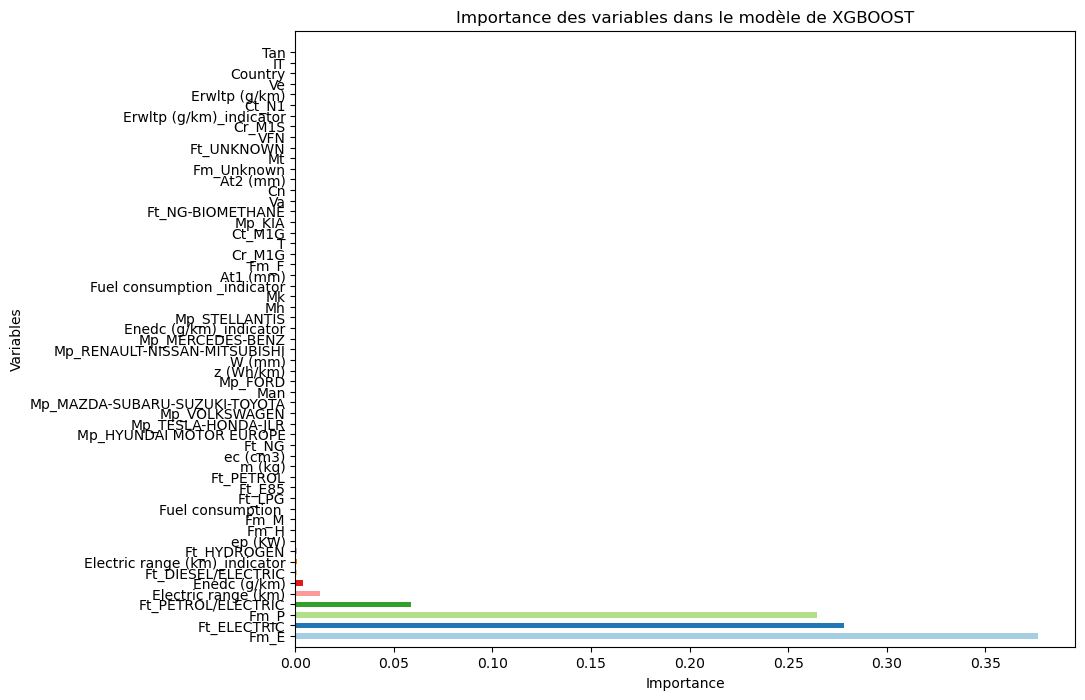

# Analyses de la distribution du residus
C'est une etape interessante qui peut permettre a l'amelioration du modele

In [ ]:
#prediction sur l'ensemble de validation et d'entrainement pour analyser la distribution des residus
y_val_pred_df=y_val_pred.copy()
# Convertir y_val_pred en DataFrame
y_val_pred_df = pd.DataFrame({'Predicted Values': y_val_pred_df})

y_val_pred_df.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/y_val_pred2.csv', index=False)

train_pred = xgb_model.predict(X_train)

train_pred_df=train_pred.copy()
train_pred_df= pd.DataFrame({'Predicted Values': train_pred_df})

train_pred_df.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/train_pred2.csv', index=False)

y_val_pred_df = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/y_val_pred2.csv')
train_pred_df = pd.read_csv('/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/train_pred2.csv')

# recuperation X_train, X_val, y_train, y_val 
X_train, X_val, y_train, y_val = train_test_split(df_encoded_train, target, test_size=0.2, random_state=42)
y_train= y_train.drop('Residuals_train', axis=1)
y_train = y_train.reset_index(drop=True)
y_val=y_val.drop('Residuals_val', axis=1)
y_val = y_val.reset_index(drop=True)

In [127]:
# Créer une DataFrame résultante en soustrayant les valeurs de y_val_pred de y_train
residus_val = y_val['Ewltp (g/km)'] - y_val_pred_df['Predicted Values']

# Créer une nouvelle DataFrame avec la colonne 'Residus_train'
residus_val_df = pd.DataFrame({'Residus_val': residus_val})

# Afficher la DataFrame résultante
print(residus_val_df)


         Residus_val
0          -4.290323
1          -4.584537
2           7.433210
3           7.766810
4           7.830779
...              ...
1514325     2.867799
1514326     0.085823
1514327     0.190986
1514328    -1.534233
1514329     3.899330

[1514330 rows x 1 columns]


In [131]:
# Créer une DataFrame résultante en soustrayant les valeurs de y_val_pred de y_train
residus_train = y_train['Ewltp (g/km)'] - train_pred_df['Predicted Values']

# Créer une nouvelle DataFrame avec la colonne 'Residus_train'
residus_train = pd.DataFrame({'Residus_train': residus_train})

# Afficher la DataFrame résultante
print(residus_train)


         Residus_train
0             2.689783
1            -3.708808
2            -6.360961
3             1.232126
4             0.478916
...                ...
6057314      -2.346691
6057315       1.486692
6057316     -11.235357
6057317      -0.353289
6057318      -0.233882

[6057319 rows x 1 columns]


In [65]:
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
# Créer une DataFrame pour les résidus
residuals_train_df = pd.DataFrame({
    'Residuals_train': y_train['Ewltp (g/km)'] - train_pred_df['Predicted Values']
    
})

# Assurez-vous que les deux DataFrames ont les mêmes indices
y_train['Residuals_train'] = y_train['Ewltp (g/km)'].sub(train_pred_df['Predicted Values'], fill_value=0)

# Afficher la DataFrame résultante
print(y_train[['Ewltp (g/km)', 'Residuals_train']])

# Calculer les résidus pour l'ensemble d'entraînement

# Créer un cDataFrame pour les résidus et les autres informations
train_df_res = pd.DataFrame({
    'Index': train_indices,
    'Residuals_train': residuals_train.values,  # Extraire les valeurs de la série pandas
    **{f'X_train_{col}': X_train[col].values for col in X_train.columns},  # Utiliser toutes les colonnes de X_train
    'train_pred': train_pred['Prediction'].values,  # Extraire les valeurs de la série pandas
    'y_train': y_train['Ewltp (g/km)'].values  # Extraire les valeurs de la série pandas
})

# Enregistrer le DataFrame dans un fichier CSV
train_df_res.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/ttrain_df_res2.csv', index=False)

In [136]:
# Calculer les résidus pour l'ensemble d'entraînement

# Créer un cDataFrame pour les résidus et les autres informations
train_df_res = pd.DataFrame({
    'Index': train_indices,
    'Residuals_train': residuals_train.values,  # Extraire les valeurs de la série pandas
    **{f'X_train_{col}': X_train[col].values for col in X_train.columns},  # Utiliser toutes les colonnes de X_train
    'train_pred': train_pred['Prediction'].values,  # Extraire les valeurs de la série pandas
    'y_train': y_train['Ewltp (g/km)'].values  # Extraire les valeurs de la série pandas
})

# Enregistrer le DataFrame dans un fichier CSV
train_df_res.to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/ttrain_df_res2.csv', index=False)

In [ ]:

## Calculer les résidus pour l'ensemble de validation
df_residus = pd.DataFrame({'Residuals_val': residus_val_df['Residus_val']})
df_y_val_pred = pd.DataFrame({'y_val_pred': y_val_pred['Prediction'].values})
df_y_val = pd.DataFrame({'y_val': y_val['Ewltp (g/km)'].values})
df_X_val = pd.DataFrame({f'X_val_{col}': X_val[col].values for col in X_val.columns})

# Concaténer les DataFrames le long de l'axe des colonnes
val_df_res = pd.concat([df_residus, df_y_val_pred, df_y_val, df_X_val], axis=1)

val_df_res .to_csv(r'/Users/melanieyakoub/Desktop/Mosef/Cours_Mosef/Data_Mining/Challenge/estimate-co2-emissions-from-cars/val_df2.csv', index=False)


# Graphique Residus sur l'ensemble d'entrainement et de validation

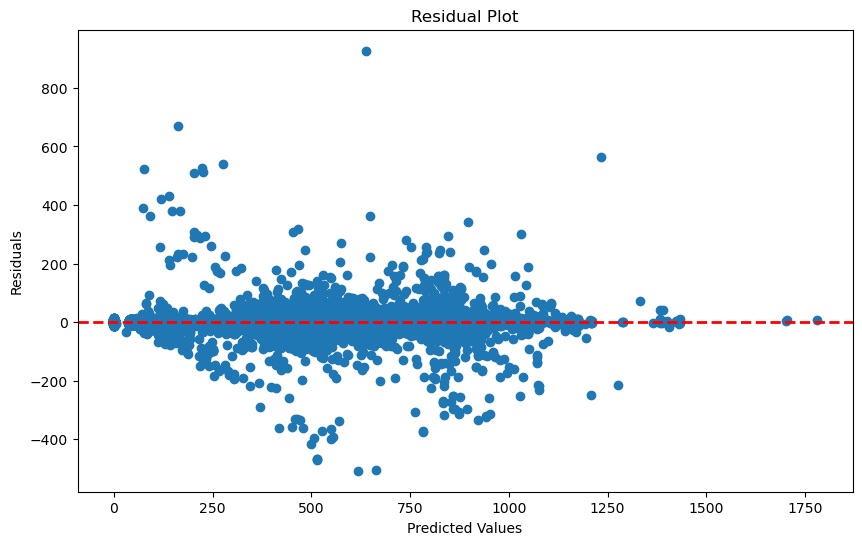

In [187]:

plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residus_val_df)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.show()
#diagramme des residus

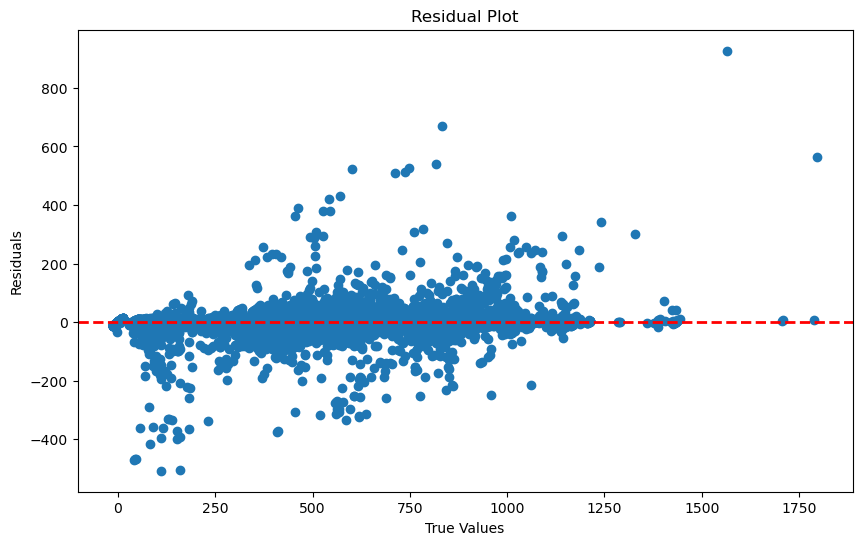

In [188]:


plt.figure(figsize=(10, 6))
plt.scatter(y_val, residus_val_df)
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.show()
#diagramme des residus

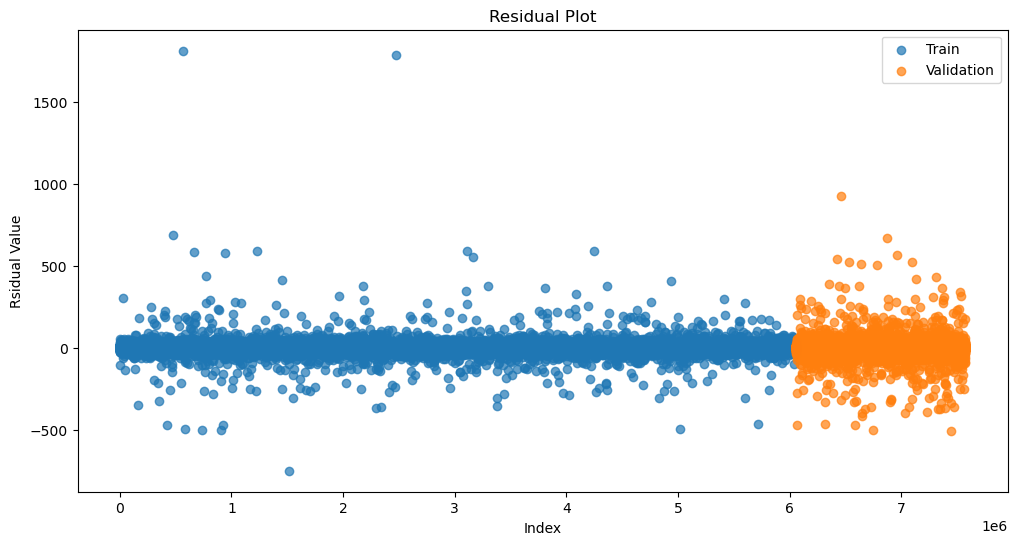

In [191]:
import matplotlib.pyplot as plt
import numpy as np

# Créer une séquence d'indices pour les ensembles d'entraînement et de validation
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))

residuals_train
residuals_val = residus_val_df['Residus_val']

# Créer le graphique
plt.figure(figsize=(12, 6))

# Tracer les résidus pour l'ensemble d'entraînement
plt.scatter(train_indices, residuals_train, label='Train', alpha=0.7)

# Tracer les résidus pour l'ensemble de validation
plt.scatter(val_indices, residuals_val, label='Validation', alpha=0.7)

# Ajouter une ligne verticale pour séparer les ensembles
#plt.axvline(x=max(train_pred), color='red', linestyle='--', linewidth=2)

# Ajouter des légendes et des titres
plt.legend()
plt.title('Residual Plot')
plt.xlabel('Index')
plt.ylabel('Rsidual Value')

# Afficher le graphique
plt.show()


# graphique residus en fonction des modalité de la variable la plus importante du modele

In [ ]:
import pandas as pd

# Supposons que 'condition_columns2' est votre liste de colonnes booléennes
condition_columns2 = ['X_val_Ft_PETROL', 'X_val_Ft_ELECTRIC', 'X_val_Ft_PETROL/ELECTRIC',
                      'X_val_Ft_LPG', 'X_val_Ft_DIESEL/ELECTRIC', 'X_val_Ft_E85',
                      'X_val_Ft_NG', 'X_val_Ft_NG-BIOMETHANE', 'X_val_Ft_HYDROGEN',
                      'X_val_Ft_UNKNOWN']

# Créer une nouvelle colonne 'Create_ft' en décodant les modalités des colonnes booléennes
val_df_res['Create_ft'] = val_df_res[condition_columns2].apply(lambda row: ', '.join(row.index[row].astype(str)), axis=1)

# Afficher le DataFrame avec la nouvelle colonne
print(val_df_res[['Create_ft']])


In [ ]:
import pandas as pd

# Supposons que 'condition_columns' est votre liste de colonnes booléennes
condition_columns = ['X_train_Ft_PETROL', 'X_train_Ft_ELECTRIC', 'X_train_Ft_PETROL/ELECTRIC',
                      'X_train_Ft_LPG', 'X_train_Ft_DIESEL/ELECTRIC', 'X_train_Ft_E85',
                      'X_train_Ft_NG', 'X_train_Ft_NG-BIOMETHANE', 'X_train_Ft_HYDROGEN',
                      'X_train_Ft_UNKNOWN']

# Créer une nouvelle colonne 'Create_ft' en décodant les modalités des colonnes booléennes
train_df_res['Create_ft'] = train_df_res[condition_columns].apply(lambda row: ', '.join(row.index[row].astype(str)), axis=1)

# Afficher le DataFrame avec la nouvelle colonne
print(train_df_res[['Create_ft']])


In [196]:
df_petrol = train_df_res[train_df_res['X_train_Ft_PETROL'] == True]
df_electric = train_df_res[train_df_res['X_train_Ft_ELECTRIC'] == True]
df_petrol_electric = train_df_res[train_df_res['X_train_Ft_PETROL/ELECTRIC'] == True]
df_lpg = train_df_res[train_df_res['X_train_Ft_LPG'] == True]
df_diesel_electric = train_df_res[train_df_res['X_train_Ft_DIESEL/ELECTRIC'] == True]
df_E85 = train_df_res[train_df_res['X_train_Ft_E85'] == True]
df_NG = train_df_res[train_df_res['X_train_Ft_NG'] == True]
df_NG_BIOMETHANE = train_df_res[train_df_res['X_train_Ft_NG-BIOMETHANE'] == True]
df_hydrogen = train_df_res[train_df_res['X_train_Ft_HYDROGEN'] == True]
df_unknown = train_df_res[train_df_res['X_train_Ft_UNKNOWN'] == True]


In [197]:
# Supposons que vous ayez un DataFrame appelé val_df
# Remplacez "val_df" par le nom réel de votre DataFrame si nécessaire

df_petrol_pred = val_df_res[val_df_res['X_val_Ft_PETROL'] == True]
#df_diesel_pred = val_df_res[~selected_columns2.any(axis=1)]
df_electric_pred = val_df_res[val_df_res['X_val_Ft_ELECTRIC'] == True]
df_petrol_electric_pred = val_df_res[val_df_res['X_val_Ft_PETROL/ELECTRIC'] == True]
df_lpg_pred = val_df_res[val_df_res['X_val_Ft_LPG'] == True]
df_diesel_electric_pred = val_df_res[val_df_res['X_val_Ft_DIESEL/ELECTRIC'] == True]
df_E85_pred = val_df_res[val_df_res['X_val_Ft_E85'] == True]
df_NG_pred = val_df_res[val_df_res['X_val_Ft_NG'] == True]
df_NG_BIOMETHANE_pred = val_df_res[val_df_res['X_val_Ft_NG-BIOMETHANE'] == True]
df_hydrogen_pred = val_df_res[val_df_res['X_val_Ft_HYDROGEN'] == True]
df_unknown_pred = val_df_res[val_df_res['X_val_Ft_UNKNOWN'] == True]


In [198]:
# Liste des colonnes à utiliser pour la condition
condition_columns2 = ['X_val_Ft_PETROL', 'X_val_Ft_ELECTRIC', 'X_val_Ft_PETROL/ELECTRIC',
                      'X_val_Ft_LPG', 'X_val_Ft_DIESEL/ELECTRIC', 'X_val_Ft_E85',
                      'X_val_Ft_NG', 'X_val_Ft_NG-BIOMETHANE', 'X_val_Ft_HYDROGEN',
                      'X_val_Ft_UNKNOWN']

# Créer une condition pour exclure les lignes associées à chaque df
exclude_condition2 = val_df_res[condition_columns2].any(axis=1)

# Créer la DataFrame df_diesel
df_diesel_pred = val_df_res[~exclude_condition2].copy()

# Supprimer la colonne '_exclude' ajoutée pour suivre les conditions d'exclusion

df_diesel_pred = df_diesel_pred.drop('_exclude', axis=1, errors='ignore')


In [199]:

condition_columns = ['X_train_Ft_PETROL', 'X_train_Ft_ELECTRIC', 'X_train_Ft_PETROL/ELECTRIC',
                      'X_train_Ft_LPG', 'X_train_Ft_DIESEL/ELECTRIC', 'X_train_Ft_E85',
                      'X_train_Ft_NG', 'X_train_Ft_NG-BIOMETHANE', 'X_train_Ft_HYDROGEN',
                      'X_train_Ft_UNKNOWN']
exclude_condition= train_df_res[condition_columns].any(axis=1)

# Supprimer la colonne '_exclude' ajoutée pour suivre les conditions d'exclusion
df_diesel= train_df_res[~exclude_condition].copy()

df_diesel= df_diesel.drop('_exclude', axis=1, errors='ignore')


/Users/melanieyakoub/anaconda3/envs/Melanie/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


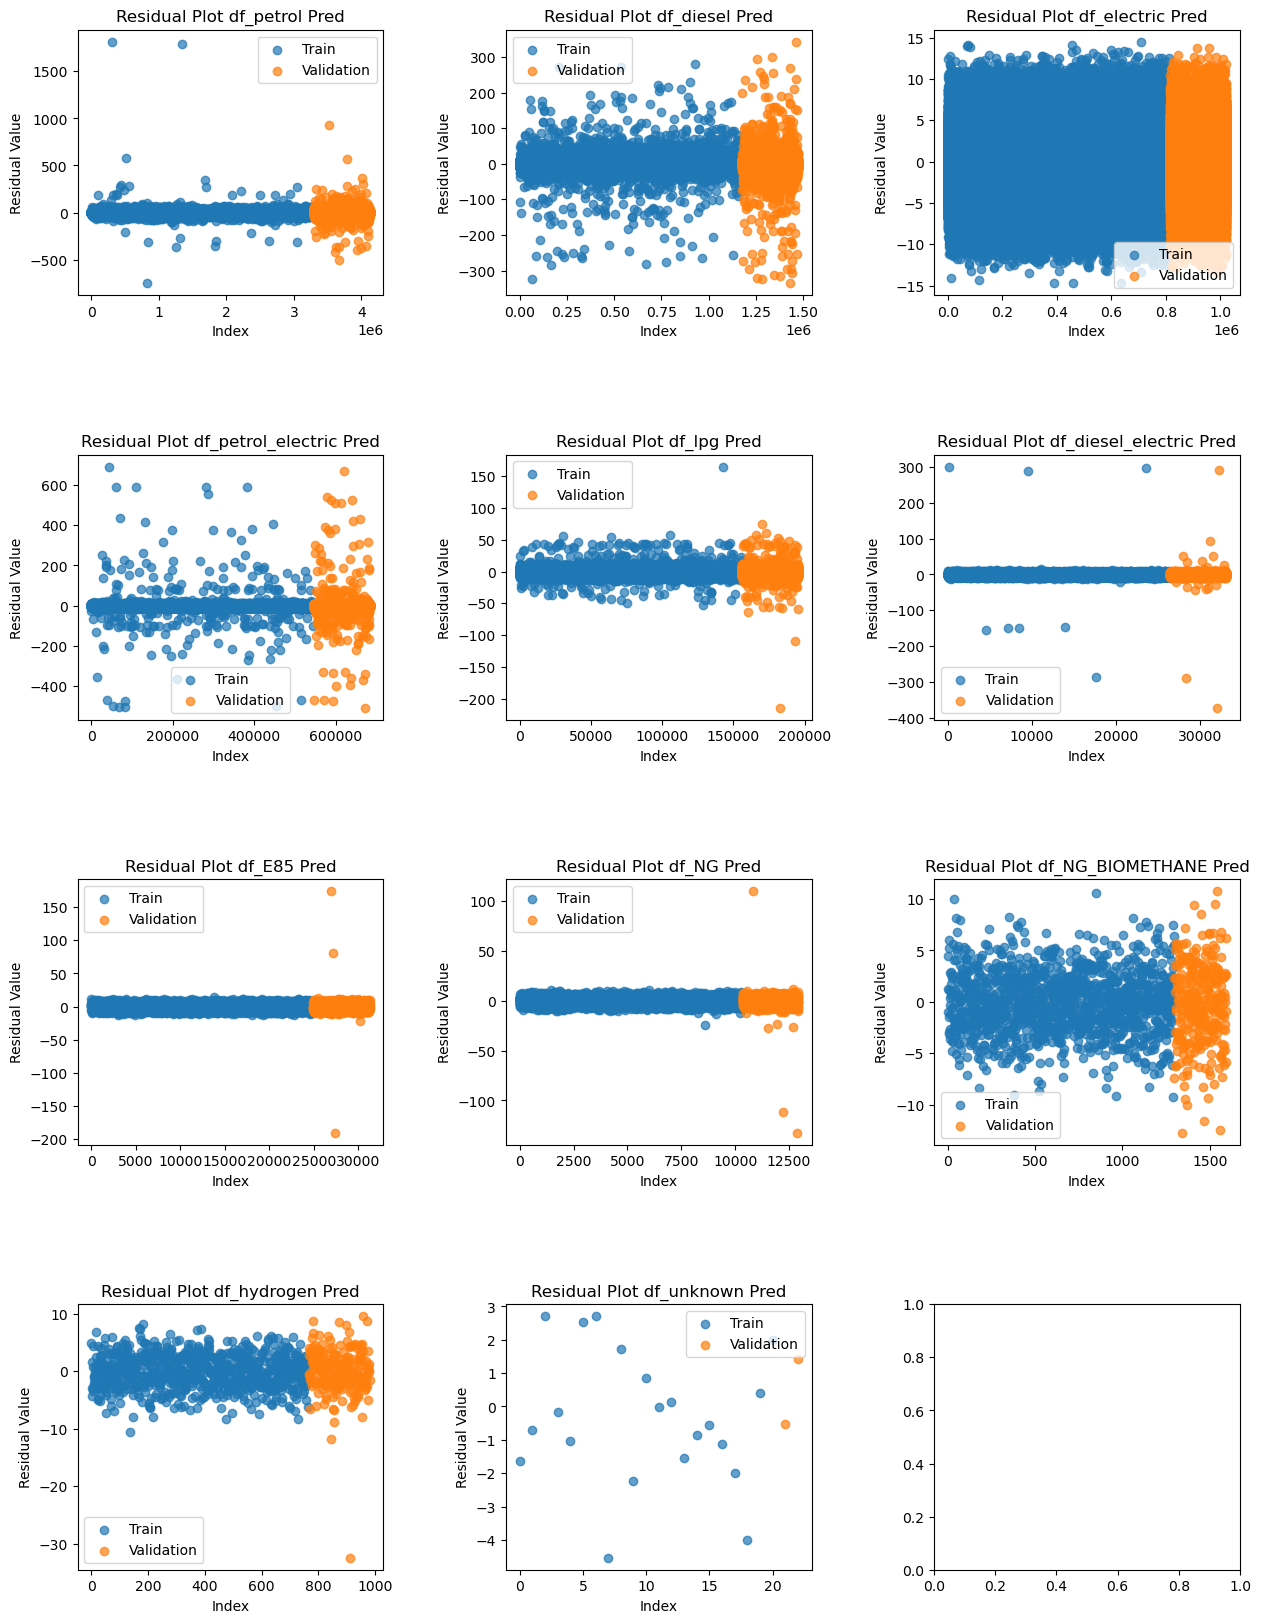

In [200]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des paires de DataFrames
df_pairs = [
    ("df_petrol", df_petrol, df_petrol_pred),
    ("df_diesel", df_diesel, df_diesel_pred),
    ("df_electric", df_electric, df_electric_pred),
    ("df_petrol_electric", df_petrol_electric, df_petrol_electric_pred),
    ("df_lpg", df_lpg, df_lpg_pred),
    ("df_diesel_electric", df_diesel_electric, df_diesel_electric_pred),
    ("df_E85", df_E85, df_E85_pred),
    ("df_NG", df_NG, df_NG_pred),
    ("df_NG_BIOMETHANE", df_NG_BIOMETHANE, df_NG_BIOMETHANE_pred),
    ("df_hydrogen", df_hydrogen, df_hydrogen_pred),
    ("df_unknown", df_unknown, df_unknown_pred)
]

# Définir le nombre de lignes et de colonnes dans la grille de sous-graphiques
num_rows = 4
num_cols = 3

# Créer une nouvelle figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Parcourir les paires de DataFrames et afficher les graphiques en sous-graphiques
for i, (df_name, df, df_pred) in enumerate(df_pairs, start=1):
    # Générer les indices pour les ensembles d'entraînement et de validation
    train_indices = np.arange(len(df))
    val_indices = np.arange(len(df), len(df) + len(df_pred))

    residuals_train = df['Residuals_train']
    residuals_val = df_pred['Residuals_val']

    # Calculer les coordonnées (ligne, colonne) du sous-graphique actuel
    row = (i - 1) // num_cols
    col = (i - 1) % num_cols

    # Tracer les résidus pour l'ensemble d'entraînement
    axes[row, col].scatter(train_indices, residuals_train, label='Train', alpha=0.7)

    # Tracer les résidus pour l'ensemble de validation
    axes[row, col].scatter(val_indices, residuals_val, label='Validation', alpha=0.7)

    # Ajouter des légendes et des titres
    axes[row, col].legend()
    axes[row, col].set_title(f'Residual Plot {df_name} Pred')
    axes[row, col].set_xlabel('Index')
    axes[row, col].set_ylabel('Residual Value')

# Afficher la figure
plt.show()


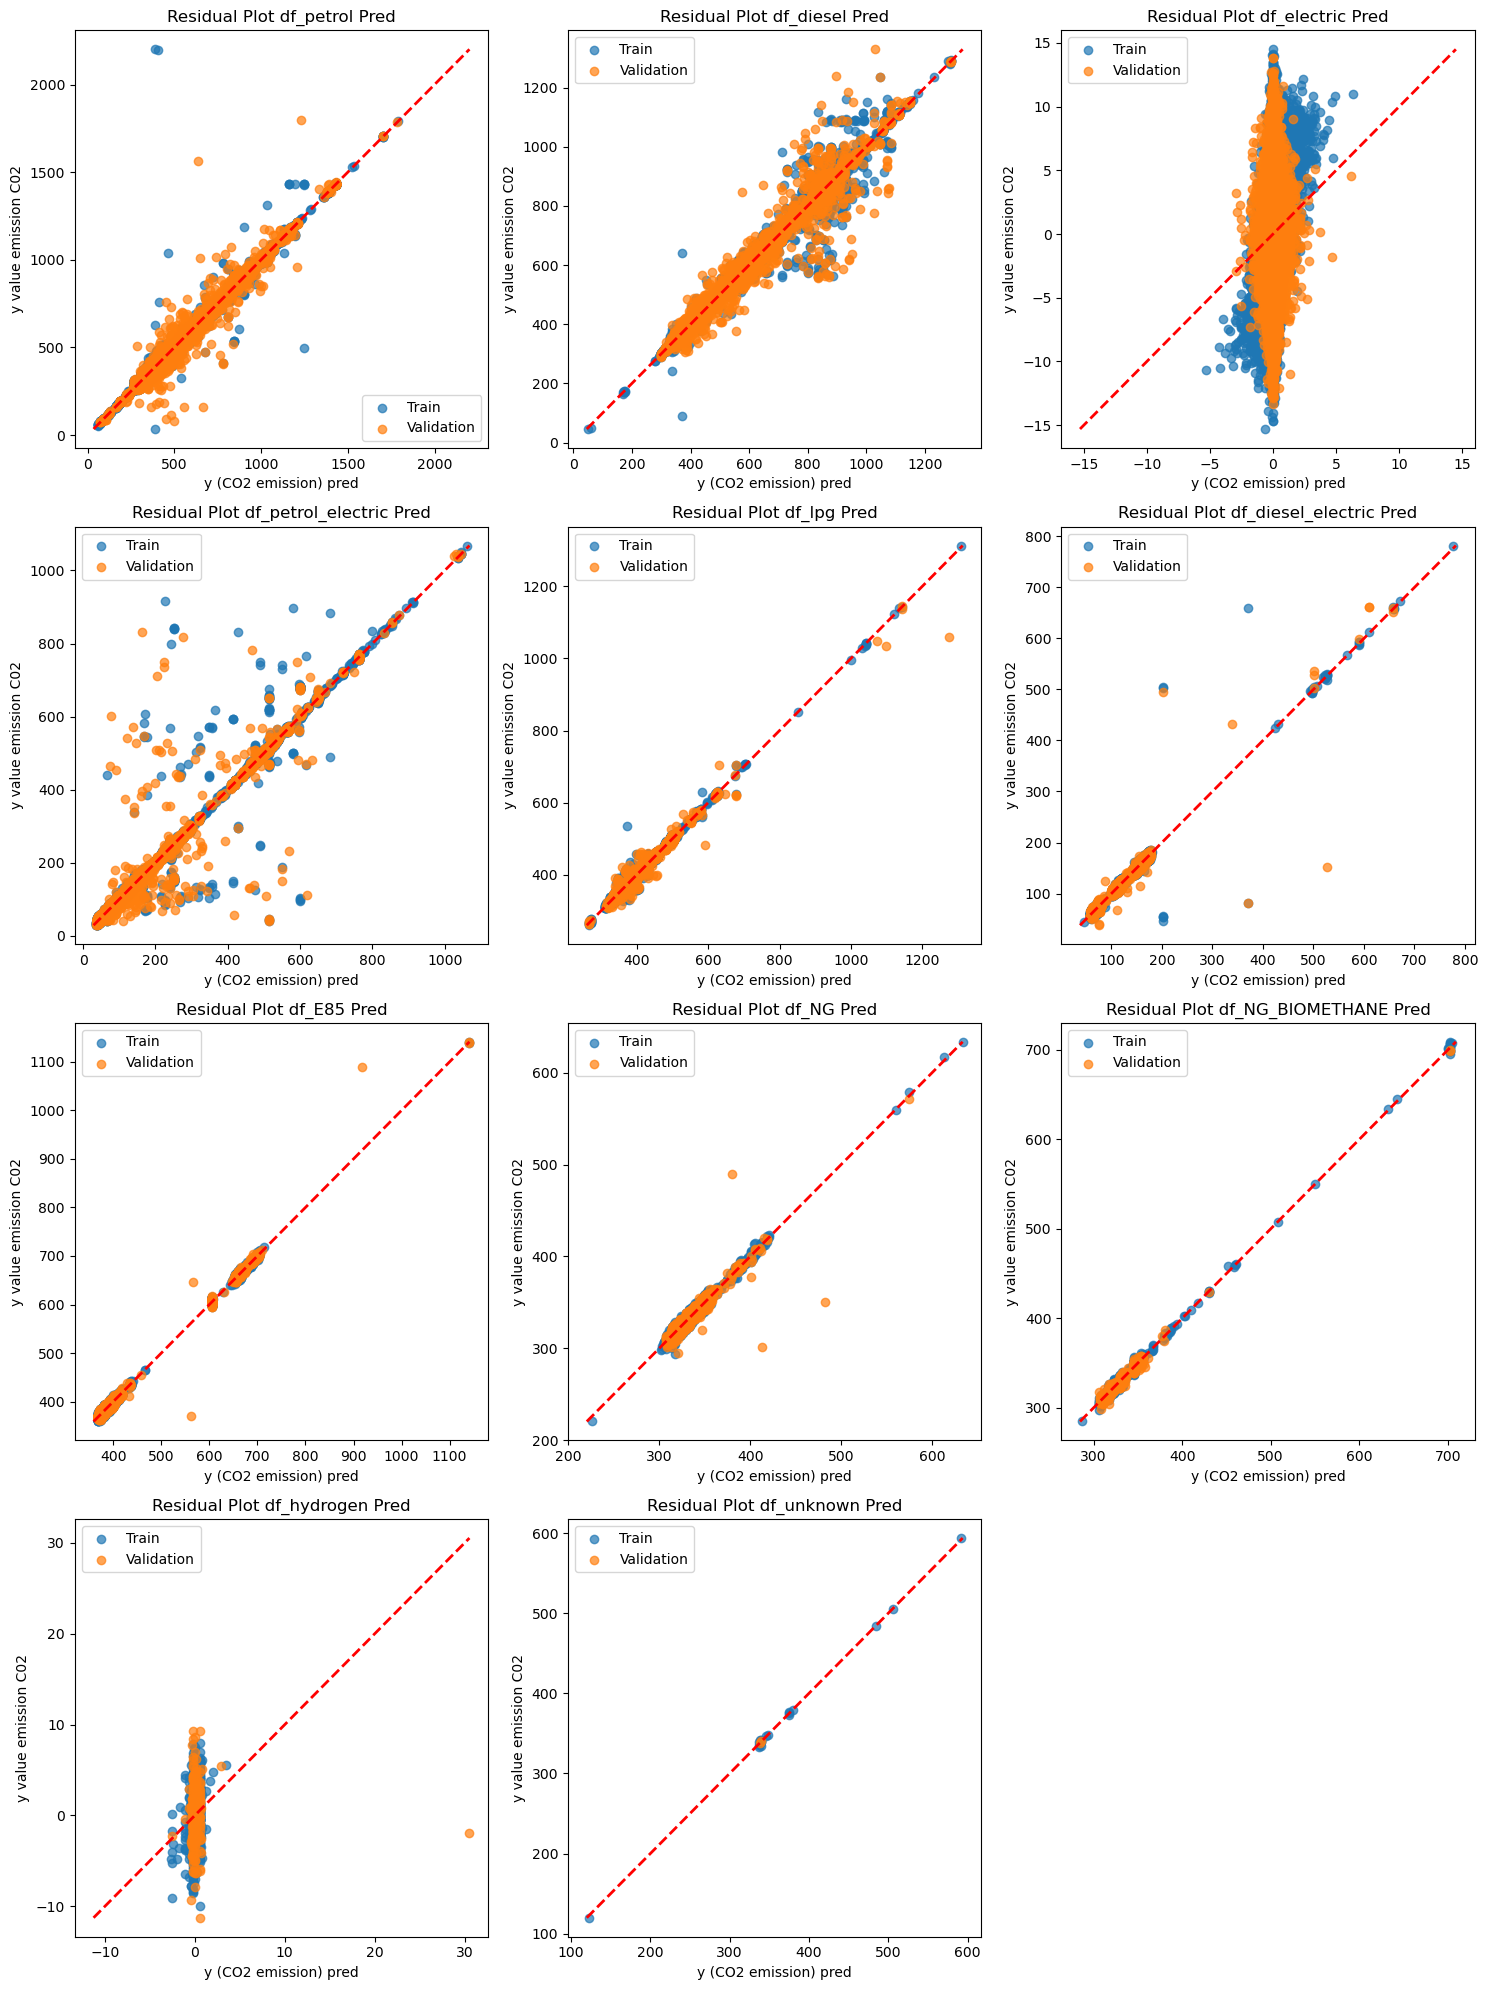

In [201]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des paires de DataFrames
df_pairs = [
    ("df_petrol", df_petrol, df_petrol_pred),
    ("df_diesel", df_diesel, df_diesel_pred),
    ("df_electric", df_electric, df_electric_pred),
    ("df_petrol_electric", df_petrol_electric, df_petrol_electric_pred),
    ("df_lpg", df_lpg, df_lpg_pred),
    ("df_diesel_electric", df_diesel_electric, df_diesel_electric_pred),
    ("df_E85", df_E85, df_E85_pred),
    ("df_NG", df_NG, df_NG_pred),
    ("df_NG_BIOMETHANE", df_NG_BIOMETHANE, df_NG_BIOMETHANE_pred),
    ("df_hydrogen", df_hydrogen, df_hydrogen_pred),
    ("df_unknown", df_unknown, df_unknown_pred)
]

# Définir le nombre de lignes et de colonnes dans la grille de sous-graphiques
num_rows = 4
num_cols = 3

# Créer une nouvelle figure
fig = plt.figure(figsize=(15, 20))

# Parcourir les paires de DataFrames et afficher les graphiques en sous-graphiques
for i, (df_name, df, df_pred) in enumerate(df_pairs, start=1):
    # Ajouter un sous-graphique à la figure
    ax = fig.add_subplot(num_rows, num_cols, i)

    # Tracer les résidus pour l'ensemble d'entraînement
    ax.scatter(df['train_pred'], df['y_train'], label='Train', alpha=0.7)

    # Tracer les résidus pour l'ensemble de validation
    ax.scatter(df_pred['y_val_pred'], df_pred['y_val'], label='Validation', alpha=0.7)

    # Ajouter une ligne diagonale
    min_val = min(df['train_pred'].min(), df['y_train'].min(), df_pred['y_val_pred'].min(), df_pred['y_val'].min())
    max_val = max(df['train_pred'].max(), df['y_train'].max(), df_pred['y_val_pred'].max(), df_pred['y_val'].max())
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

    # Ajouter des légendes et des titres
    ax.legend()
    ax.set_title(f'Residual Plot {df_name} Pred')
    ax.set_xlabel('y (CO2 emission) pred')
    ax.set_ylabel('y value emission C02')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


In [ ]:
import pandas as pd

# Supposons que 'Residuals_val' est le nom de la colonne des résidus dans votre dataframe
col_name_val_df = 'Residuals_val'

# Calculer le nombre d'observations correspondant à 20 % des données
num_observations_val_df = int(0.2 * len(val_df_res))

# Tri par la colonne des résidus en valeur absolue
sorted_df_val_df = val_df_res.assign(abs_residus=val_df_res[col_name_val_df].abs()).sort_values('abs_residus', ascending=False)

# Sélectionner les 20 % des observations les plus élevées
top_20_percent_residus_val_df = sorted_df_val_df.head(num_observations_val_df)

# Supprimer la colonne temporaire ajoutée pour le tri
top_20_percent_residus_val_df = top_20_percent_residus_val_df.drop('abs_residus', axis=1)

# Afficher les résultats
print(top_20_percent_residus_val_df)


In [ ]:
import pandas as pd

# Supposons que 'residus' est le nom de la colonne des résidus dans votre dataframe
col_name ='Residuals_train'

# Calculer le nombre d'observations correspondant à 20 % des données
num_observations = int(0.2 * len(train_df_res))

# Tri par la colonne des résidus en valeur absolue
sorted_df = train_df_res.assign(abs_residus=train_df_res[col_name].abs()).sort_values('abs_residus', ascending=False)

# Sélectionner les 20 % des observations les plus élevées
top_20_percent_residus = sorted_df.head(num_observations)

# Supprimer la colonne temporaire ajoutée pour le tri
top_20_percent_residus = top_20_percent_residus.drop('abs_residus', axis=1)

# Afficher les résultats
print(top_20_percent_residus)


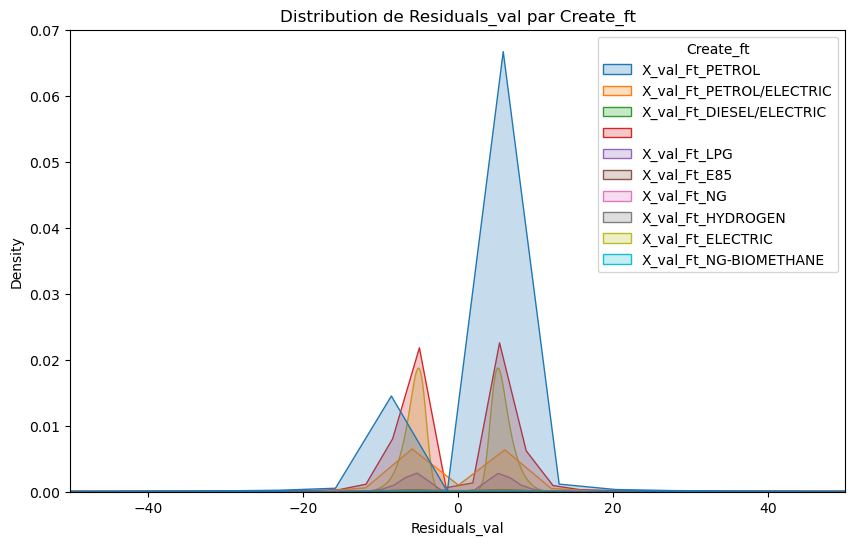

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de données
# Supposons que "variable_categorique" est la variable catégorielle
# et "variable_quantitative" est la variable quantitative

# Liste des variables catégorielles
variables_categorielles = ['Create_ft']

# Variable quantitative
variable_quantitative = 'Residuals_val'

# Boucle pour générer les tracés de densité
for var_cat in variables_categorielles:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=top_20_percent_residus_val_df, x=variable_quantitative, hue=var_cat, fill=True)
    
    # Définir les limites de l'axe des abscisses entre -100 et 100
    plt.xlim(-50, 50)
    
    plt.title(f'Distribution de {variable_quantitative} par {var_cat}')
    plt.show()


/var/folders/s3/c5vhrtm50hbggd9zt745xxnm0000gn/T/ipykernel_1001/2581898726.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=top_20_percent_residus, x=variable_quantitative, hue=var_cat, fill=True)


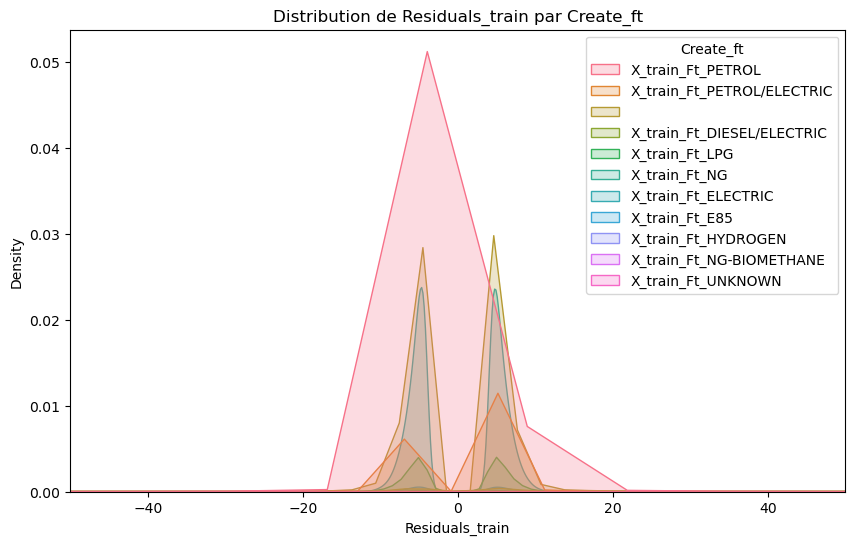

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de données
# Supposons que "variable_categorique" est la variable catégorielle
# et "variable_quantitative" est la variable quantitative

# Liste des variables catégorielles
variables_categorielles = ['Create_ft']

# Variable quantitative
variable_quantitative = 'Residuals_train'

# Boucle pour générer les tracés de densité
for var_cat in variables_categorielles:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=top_20_percent_residus, x=variable_quantitative, hue=var_cat, fill=True)
    
    # Définir les limites de l'axe des abscisses entre -50 et 50
    plt.xlim(-50, 50)
    
    plt.title(f'Distribution de {variable_quantitative} par {var_cat}')
    plt.show()
